In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import datetime as dt
import seaborn as sns
import hvplot.pandas
import panel as pn
pn.extension('plotly')

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (22,12)


In [3]:
# Load .env enviroment variables
load_dotenv()


True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
start_date = pd.Timestamp("2017-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_1.head()

GME                                 
                            open     high    low   close   volume
time                                                             
2017-05-19 00:00:00-04:00  23.80  24.3050  23.58  24.220  2087442
2017-05-22 00:00:00-04:00  24.35  24.5995  24.04  24.060  2206389
2017-05-23 00:00:00-04:00  24.37  24.3700  22.63  22.660  5162704
2017-05-24 00:00:00-04:00  22.61  22.8700  22.43  22.715  2175144
2017-05-25 00:00:00-04:00  23.64  23.6700  22.73  23.630  5911630

In [6]:
df_gamestop_1.index = df_gamestop_1.index.values.astype('datetime64[D]')
df_gamestop_1.index = df_gamestop_1.index.set_names(['Date'])
df_gamestop_1.tail()

GME                            
            open  high    low close   volume
Date                                        
2020-05-13  4.54  4.54  4.070  4.20  2820213
2020-05-14  4.15  4.19  3.960  4.14  1937248
2020-05-15  4.05  4.45  4.041  4.23  1827240
2020-05-18  4.40  4.63  4.360  4.57  2227162
2020-05-19  4.58  4.75  4.370  4.44  1783139

In [7]:
df_gamestop_1.to_csv("df_gamestop_1.csv")

In [8]:
MC_ten_year_1 = MCSimulation(
    portfolio_data = df_gamestop_1,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [9]:
MC_ten_year_1.portfolio_data.head()

GME                                              
             open     high    low   close   volume daily_return
Date                                                           
2017-05-19  23.80  24.3050  23.58  24.220  2087442          NaN
2017-05-22  24.35  24.5995  24.04  24.060  2206389    -0.006606
2017-05-23  24.37  24.3700  22.63  22.660  5162704    -0.058188
2017-05-24  22.61  22.8700  22.43  22.715  2175144     0.002427
2017-05-25  23.64  23.6700  22.73  23.630  5911630     0.040282

In [10]:
MC_ten_year_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.077003  1.007941  1.000802  1.008607  1.025320  0.882355  1.008023   
2     1.077254  1.000714  0.986382  0.977853  0.968479  0.941640  1.048902   
3     1.079028  1.021679  0.951093  0.930748  0.975179  0.903739  1.010286   
4     1.115048  1.038228  0.927200  0.928040  0.962010  0.903916  1.012099   
5     1.077319  1.005879  0.945216  0.979485  0.939997  0.908069  1.019212   
6     1.078792  1.125609  0.989095  1.053918  0.891442  0.892992  1.012636   
7     1.077500  1.142806  0.935201  1.055049  0.873226  0.945639  0.976907   
8     1.126553  1.225330  0.880288  1.017567  0.888956  0.993388  0.900025   
9     1.192826  1.227535  0.865737  1.070161  0.911938  1.055948  0.839814   
10    1.115270  1.201555  0.804203  1.111683  0.886371  1.006806  0.865370   
11    1.070689  1.214318  0.798114  1.116531  0.883100  1.010395  0.872498   
12    1.086114  1.291828  0.753889  1.089070  0.863690  1.012424  0.874730   
13    0.982906  1.253369  0.733162  1.003965  0.865695  1.036216  0.903186   
14    0.960275  1.338162  0.698852  0.981232  0.896824  1.061896  0.832384   
15    0.964382  1.289752  0.683987  0.988419  0.973509  1.064985  0.819551   
16    0.982789  1.336069  0.665152  0.989868  0.970145  1.134614  0.838186   
17    0.947580  1.399821  0.660520  0.962528  0.993739  1.136488  0.869632   
18    0.884378  1.359745  0.676067  1.057233  1.028180  1.131921  0.885202   
19    0.931283  1.294151  0.667017  1.091110  1.009610  1.091848  0.862176   
20    0.984926  1.281526  0.675639  1.042815  1.045171  1.150302  0.789221   
21    0.986667  1.306584  0.652679  1.106194  1.062697  1.166601  0.799375   
22    0.906179  1.240429  0.636416  1.092085  1.062633  1.188004  0.809921   
23    0.924070  1.216468  0.652701  1.021785  1.053279  1.171230  0.781032   
24    0.852937  1.224442  0.621967  1.068671  0.956563  1.201309  0.756359   
25    0.895297  1.182992  0.614972  1.093084  0.888138  1.154857  0.761090   
26    0.926628  1.205685  0.651667  1.190080  0.930689  1.196440  0.736498   
27    0.897017  1.127760  0.679130  1.214966  0.875591  1.154138  0.733369   
28    0.889239  1.075348  0.680077  1.224389  0.907303  1.121109  0.747517   
29    0.878928  1.051339  0.665362  1.252547  0.926487  1.138003  0.731708   
...        ...       ...       ...       ...       ...       ...       ...   
2491  0.001857  0.012111  0.000113  0.000546  0.009039  0.020218  0.030209   
2492  0.001935  0.012801  0.000105  0.000502  0.009540  0.021034  0.030972   
2493  0.001862  0.013238  0.000098  0.000515  0.010488  0.020625  0.032016   
2494  0.001850  0.011926  0.000097  0.000504  0.010359  0.019087  0.032913   
2495  0.001727  0.011649  0.000095  0.000488  0.010743  0.017323  0.033793   
2496  0.001791  0.011569  0.000096  0.000521  0.010380  0.018510  0.035236   
2497  0.001835  0.011284  0.000096  0.000537  0.010939  0.018966  0.035449   
2498  0.001831  0.011943  0.000101  0.000587  0.011196  0.020210  0.036979   
2499  0.001798  0.012470  0.000103  0.000588  0.010886  0.020459  0.035181   
2500  0.001789  0.012291  0.000110  0.000622  0.011207  0.020101  0.034934   
2501  0.001806  0.012340  0.000104  0.000621  0.010832  0.019343  0.034375   
2502  0.001807  0.012071  0.000094  0.000630  0.010340  0.020757  0.034857   
2503  0.001859  0.012672  0.000092  0.000572  0.010801  0.019555  0.035227   
2504  0.001884  0.012526  0.000084  0.000589  0.011132  0.020255  0.034765   
2505  0.001851  0.012051  0.000086  0.000594  0.011302  0.021963  0.036142   
2506  0.001901  0.012680  0.000090  0.000641  0.011535  0.021735  0.036433   
2507  0.001878  0.013003  0.000093  0.000673  0.011879  0.020599  0.034769   
2508  0.001893  0.012418  0.000092  0.000700  0.011911  0.020709  0.033682   
2509  0.001815  0.011679  0.000099  0.000722  0.011679  0.021351  0.034303   
2510  0.001823  0.012064  0.00010

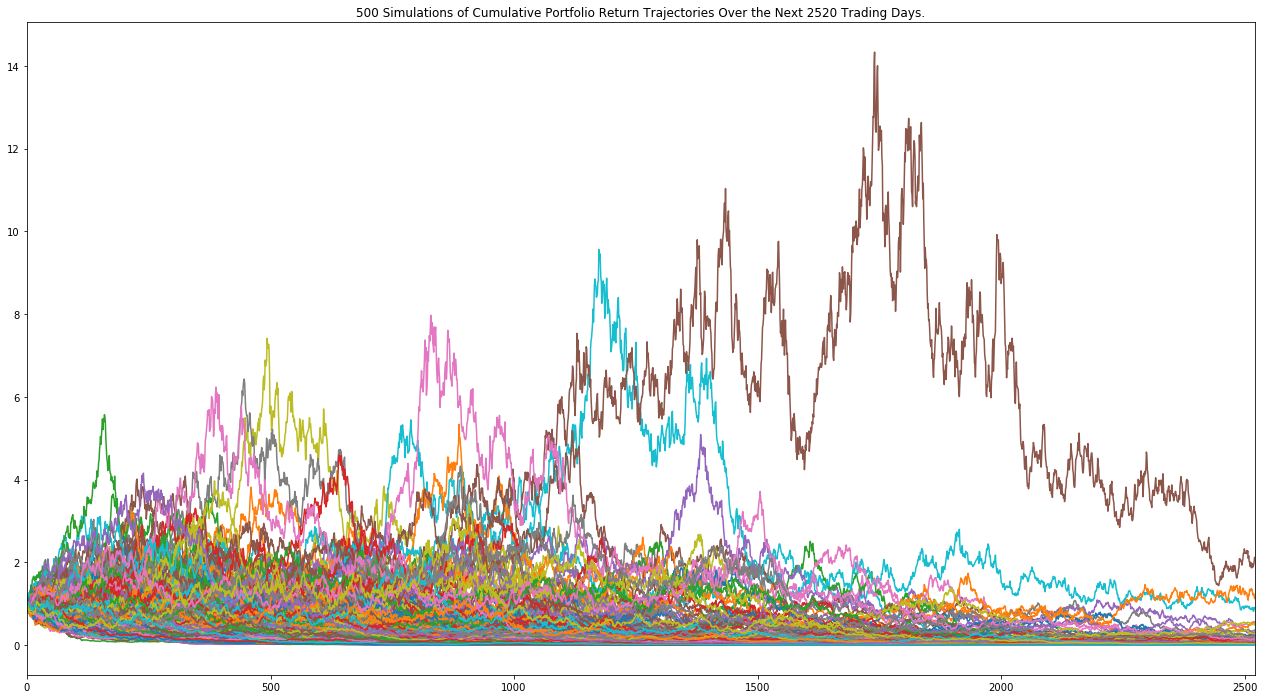

In [11]:
Sim_plot_prevolatility = MC_ten_year_1.plot_simulation()
plt.savefig("Sim_plot_prevolatility.png")


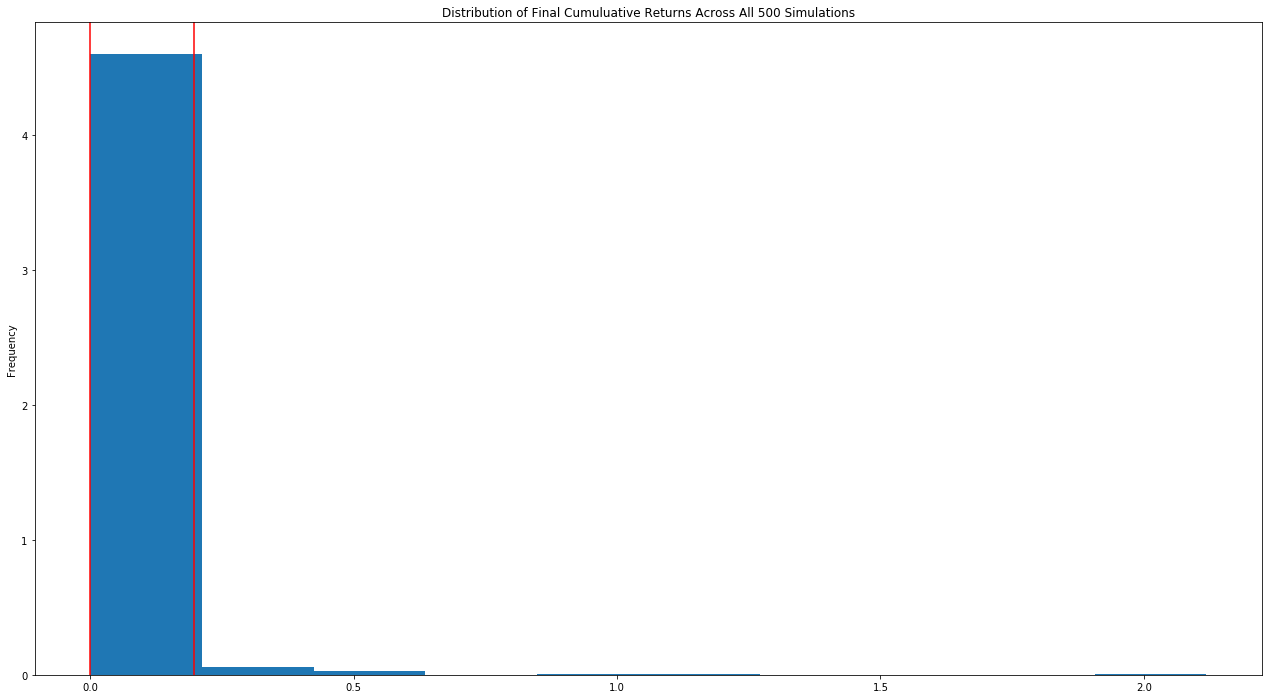

In [12]:
dist_plot_1 = MC_ten_year_1.plot_distribution()
plt.savefig("dist_plot_1.png")

In [13]:
tbl_1 = MC_ten_year_1.summarize_cumulative_return()

print(tbl_1)

count           500.000000
mean              0.030062
std               0.126783
min               0.000010
25%               0.000904
50%               0.002889
75%               0.013890
max               2.118690
95% CI Lower      0.000070
95% CI Upper      0.197198
Name: 2520, dtype: float64


In [14]:

start_date = pd.Timestamp("2018-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_2.head()



GME                                
                            open    high    low   close   volume
time                                                            
2018-05-21 00:00:00-04:00  12.52  12.885  12.49  12.765  4690915
2018-05-22 00:00:00-04:00  12.78  12.910  12.54  12.615  4030010
2018-05-23 00:00:00-04:00  12.54  12.750  12.44  12.710  2822301
2018-05-24 00:00:00-04:00  12.58  12.780  12.45  12.730  2678786
2018-05-25 00:00:00-04:00  12.75  12.800  12.58  12.640  2170417

In [15]:
df_gamestop_2.index = df_gamestop_2.index.values.astype('datetime64[D]')
df_gamestop_2.index = df_gamestop_2.index.set_names(['Date'])
df_gamestop_2.tail()

GME                                    
              open      high     low    close   volume
Date                                                  
2021-05-13  147.81  169.9500  146.43  164.999  8604753
2021-05-14  161.08  166.4700  156.22  159.910  4123996
2021-05-17  159.92  182.5000  159.00  180.505  7193150
2021-05-18  174.70  189.2000  168.27  180.574  7540252
2021-05-19  172.73  178.9799  164.15  168.839  4604042

In [16]:
df_gamestop_2.to_csv("df_gamestop_2.csv")

In [17]:
MC_ten_year_2 = MCSimulation(
    portfolio_data = df_gamestop_2,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [18]:
GME_returns = MC_ten_year_2.portfolio_data

In [19]:
GME_returns.head()

GME                                             
             open    high    low   close   volume daily_return
Date                                                          
2018-05-21  12.52  12.885  12.49  12.765  4690915          NaN
2018-05-22  12.78  12.910  12.54  12.615  4030010    -0.011751
2018-05-23  12.54  12.750  12.44  12.710  2822301     0.007531
2018-05-24  12.58  12.780  12.45  12.730  2678786     0.001574
2018-05-25  12.75  12.800  12.58  12.640  2170417    -0.007070

In [20]:
GME_daily_return = GME_returns['GME']['daily_return'] 

In [21]:
GME_daily_return.head()

Date
2018-05-21         NaN
2018-05-22   -0.011751
2018-05-23    0.007531
2018-05-24    0.001574
2018-05-25   -0.007070
Name: daily_return, dtype: float64

In [22]:
GME_daily_return = GME_daily_return.dropna()

GME_daily_return.isnull().sum()

0

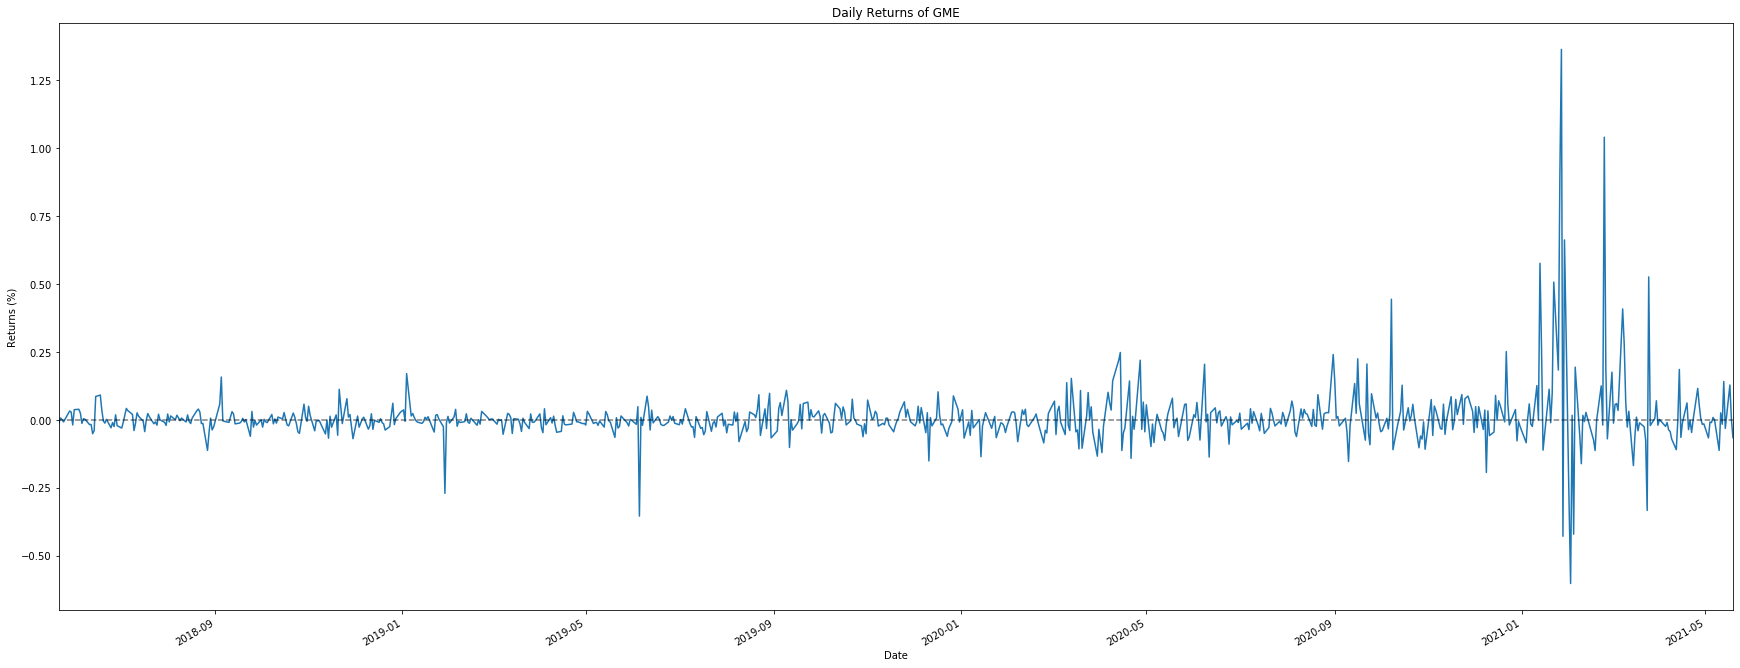

In [23]:
#GME daily returns plot

GME_return_plt = GME_daily_return.plot(figsize=(30,12), title='Daily Returns of GME')
GME_return_plt.set(ylabel='Returns (%)')
plt.axhline(y=0.0, color='k', alpha=0.5, linestyle='--')  
plt.savefig("GME_return_plt.png")
plt.show()


In [24]:
MC_ten_year_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1            2             3             4         5    \
0     1.000000    1.000000     1.000000  1.000000e+00  1.000000e+00  1.000000   
1     0.868057    0.935375     1.098409  9.386353e-01  1.075297e+00  1.036524   
2     0.887793    0.955255     1.209272  1.028825e+00  1.210324e+00  1.062786   
3     0.920791    0.818650     1.076495  1.003998e+00  1.272272e+00  1.260788   
4     0.904677    0.843949     1.031504  9.558304e-01  9.889290e-01  1.384882   
5     0.786501    0.877830     1.086661  1.022680e+00  1.064586e+00  1.249014   
6     0.851981    1.024187     0.981451  1.065951e+00  1.164739e+00  1.219121   
7     0.843985    1.091489     1.216619  1.084869e+00  1.252526e+00  1.258053   
8     0.791472    1.062546     1.291545  1.237437e+00  1.352941e+00  1.476759   
9     0.840262    1.163225     1.481525  1.420154e+00  1.401898e+00  1.582263   
10    0.768158    1.210410     1.290931  1.521955e+00  1.295392e+00  1.488706   
11    0.678398    1.355275     1.208596  1.055114e+00  1.410561e+00  1.330564   
12    0.606920    1.258943     1.389695  9.248060e-01  1.651359e+00  1.385571   
13    0.499755    1.303053     1.069313  7.719517e-01  1.815100e+00  1.474306   
14    0.547179    1.325772     1.011561  7.824917e-01  2.097303e+00  1.663973   
15    0.585299    1.169473     1.029809  8.369029e-01  2.190303e+00  1.545452   
16    0.631758    1.193515     1.204437  9.616020e-01  2.512726e+00  1.800837   
17    0.675176    1.294752     1.001850  8.922058e-01  2.356157e+00  1.880427   
18    0.766206    1.309546     1.112249  1.052129e+00  2.373947e+00  1.949314   
19    0.718281    1.571805     1.315985  1.227531e+00  2.844971e+00  2.123646   
20    0.820510    1.514360     1.420025  1.461904e+00  2.844511e+00  2.330230   
21    0.906677    1.323696     1.352987  1.384508e+00  2.422650e+00  2.535890   
22    0.795194    1.356605     1.425500  1.496729e+00  2.618580e+00  2.723831   
23    0.807941    1.357507     1.520066  1.289327e+00  3.311922e+00  2.665751   
24    0.791100    1.305230     1.483918  1.179876e+00  3.451459e+00  1.966966   
25    0.773380    1.286443     1.553606  1.396871e+00  3.495494e+00  1.690173   
26    0.690336    1.367325     1.692807  1.088015e+00  3.754412e+00  1.855180   
27    0.629893    1.641681     1.616901  1.045454e+00  3.921172e+00  2.205983   
28    0.618742    1.894323     1.777997  1.335191e+00  4.278404e+00  2.167821   
29    0.579527    1.279094     1.799077  1.488431e+00  4.873305e+00  2.355559   
...        ...         ...          ...           ...           ...       ...   
2491  0.358115   84.385666   609.739952  9.974434e+05  4.225370e+07  4.858671   
2492  0.370685   81.293513   723.848023  1.138784e+06  3.913923e+07  3.785133   
2493  0.407056   87.636526   737.733368  1.122986e+06  3.357074e+07  3.811256   
2494  0.403035   77.526316   884.271912  1.161098e+06  2.822331e+07  4.278252   
2495  0.501929   76.500161   882.868013  1.137207e+06  3.104979e+07  4.028180   
2496  0.498970   88.348041   945.379656  1.170152e+06  3.271611e+07  4.172755   
2497  0.463482   89.148388  1086.819427  1.094422e+06  3.799641e+07  4.099726   
2498  0.442079   84.293006  1273.599892  9.459686e+05  4.413307e+07  4.044719   
2499  0.419008   93.321060  1029.525411  8.800485e+05  3.718633e+07  4.927596   
2500  0.372081   78.375182   934.854530  8.453504e+05  3.521777e+07  5.352690   
2501  0.392031   71.309107   954.040550  8.429427e+05  3.639872e+07  5.205632   
2502  0.422731   73.562383   755.804657  8.846847e+05  3.798696e+07  3.621717   
2503  0.467201   75.568453   730.809465  8.192075e+05  3.626179e+07  4.125743   
2504  0.460733   82.788062   807.438784  9.768644e+05  3.385529e+07  4.230104   
2505  0.411544   88.928533   933.015412  8.603546e+05  3.725055e+07  4.352014   
2506  0.406373  106.968729   990.110922  7.539801e+05  3.164871e+07  4.354643   
2507  0.406758  106.664560   940.076959  7.924703e+05  4.011083e+07  4.574024   
2508  0.495471  107.339063  1025.645354  6

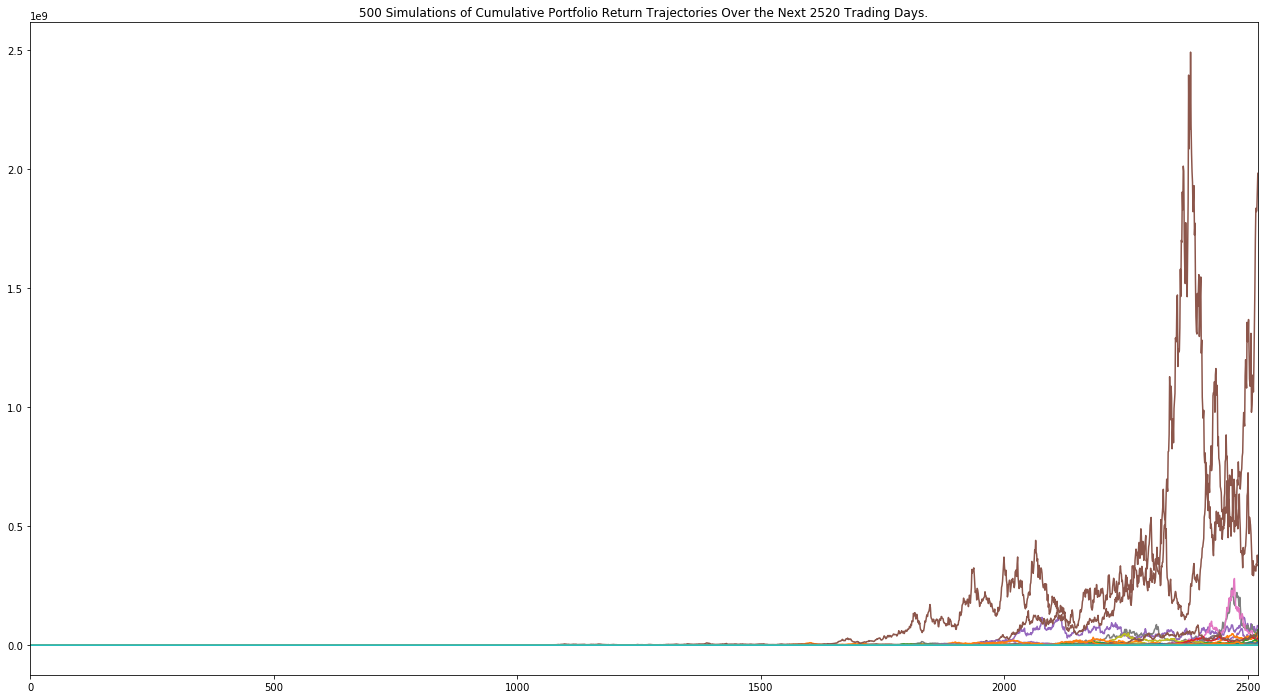

In [25]:
Sim_plot_postvolatility = MC_ten_year_2.plot_simulation()
plt.savefig("Sim_plot_postvolatility.png")

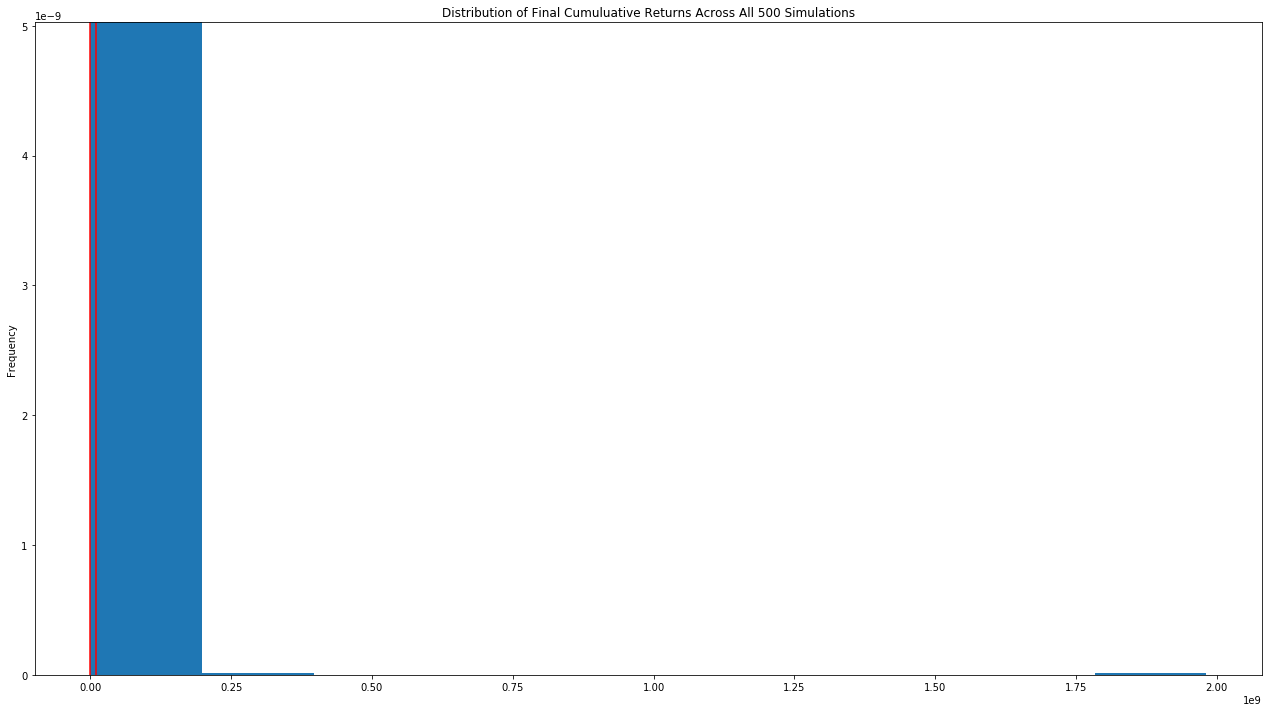

In [26]:
dist_plot_2 = MC_ten_year_2.plot_distribution()
plt.savefig("dist_plot_2.png")

In [27]:
tbl_2 = MC_ten_year_2.summarize_cumulative_return()

print(tbl_2)

count           5.000000e+02
mean            5.677701e+06
std             9.011438e+07
min             1.161385e-04
25%             9.472522e+00
50%             2.693831e+02
75%             1.346485e+04
max             1.981490e+09
95% CI Lower    4.674842e-03
95% CI Upper    1.034005e+07
Name: 2520, dtype: float64


In [28]:
#Import Twitter data for GME mentions 

twitter_data_path = Path("twitter_data_2021.csv")

twitter_data = pd.read_csv(twitter_data_path, parse_dates=True, infer_datetime_format=True)

twitter_data['Date']=pd.to_datetime(twitter_data['Date'])

twitter_data = twitter_data.set_index('Date')

twitter_data.tail()



gamestock gamestonk gme r/wallstreetbets  total_tweets
Date                                                             
2021-05-15         0         0   0                0             0
2021-05-16         0         0   0                0             0
2021-05-17         0         0   0                0             0
2021-05-18         0         0   0                0             0
2021-05-19         0         0   0                0             0

In [29]:
import datetime as dt

df_gamestop_2.index = df_gamestop_2.index.values.astype('datetime64[D]')
df_gamestop_2.index = df_gamestop_2.index.set_names(['Date'])
df_gamestop_2.tail()

GME                                    
              open      high     low    close   volume
Date                                                  
2021-05-13  147.81  169.9500  146.43  164.999  8604753
2021-05-14  161.08  166.4700  156.22  159.910  4123996
2021-05-17  159.92  182.5000  159.00  180.505  7193150
2021-05-18  174.70  189.2000  168.27  180.574  7540252
2021-05-19  172.73  178.9799  164.15  168.839  4604042

In [30]:
Social_GME_data = pd.merge(twitter_data, df_gamestop_2['GME'], how='outer', on='Date')

Social_GME_data = Social_GME_data.drop(['gamestock','gamestonk','gme','r/wallstreetbets'], axis =1)

Social_GME_data = Social_GME_data.drop(['open','high','low','volume'], axis =1)

Social_GME_data.rename(columns = {'total_tweets': 'Total Tweets', 'close': 'Closing Price'}, inplace = True)

Social_GME_data.head()


Total Tweets  Closing Price
Date                                   
2018-05-21           301         12.765
2018-05-22           413         12.615
2018-05-23           324         12.710
2018-05-24           328         12.730
2018-05-25           315         12.640

In [31]:
Social_GME_data_pct = Social_GME_data .pct_change()

Social_GME_data_pct.head()

Total Tweets  Closing Price
Date                                   
2018-05-21           NaN            NaN
2018-05-22      0.372093      -0.011751
2018-05-23     -0.215496       0.007531
2018-05-24      0.012346       0.001574
2018-05-25     -0.039634      -0.007070

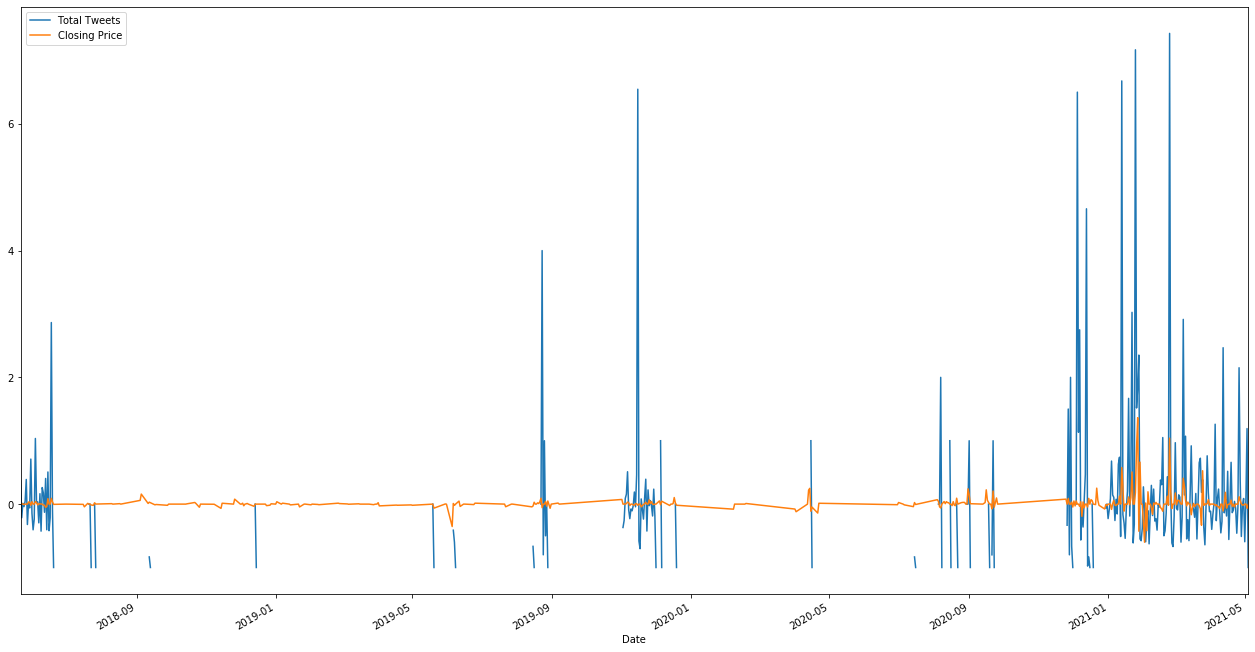

In [32]:
Social_GME_pct_plot  = Social_GME_data_pct.dropna() 
Social_GME_pct_plot.head()

Social_GME_pct_plot.plot()
plt.savefig("Social_GME_pct_plot.png")



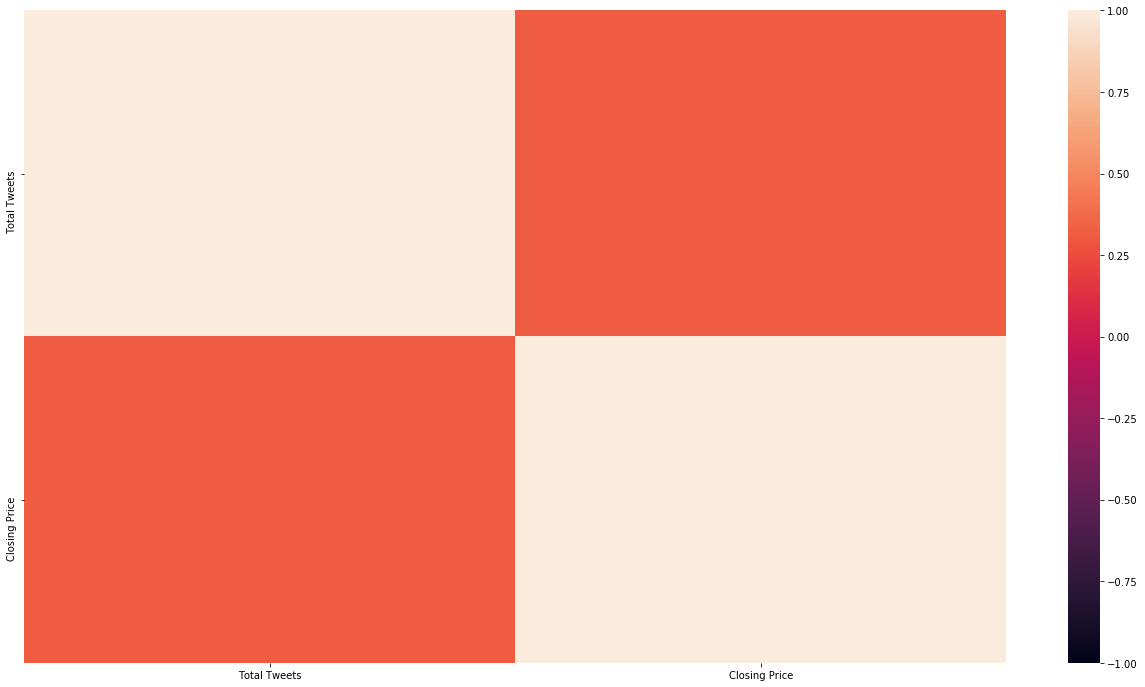

In [33]:
social_GME_corr = Social_GME_pct_plot.corr()
social_GME_corr = sns.heatmap(social_GME_corr ,vmin=-1, vmax=1)
plt.savefig("social_GME_corr.png")

In [34]:
GME_daily_return.head()

Date
2018-05-22   -0.011751
2018-05-23    0.007531
2018-05-24    0.001574
2018-05-25   -0.007070
2018-05-29    0.033228
Name: daily_return, dtype: float64

In [35]:
daily_returns_ewm = GME_daily_return.ewm(halflife=21).std()

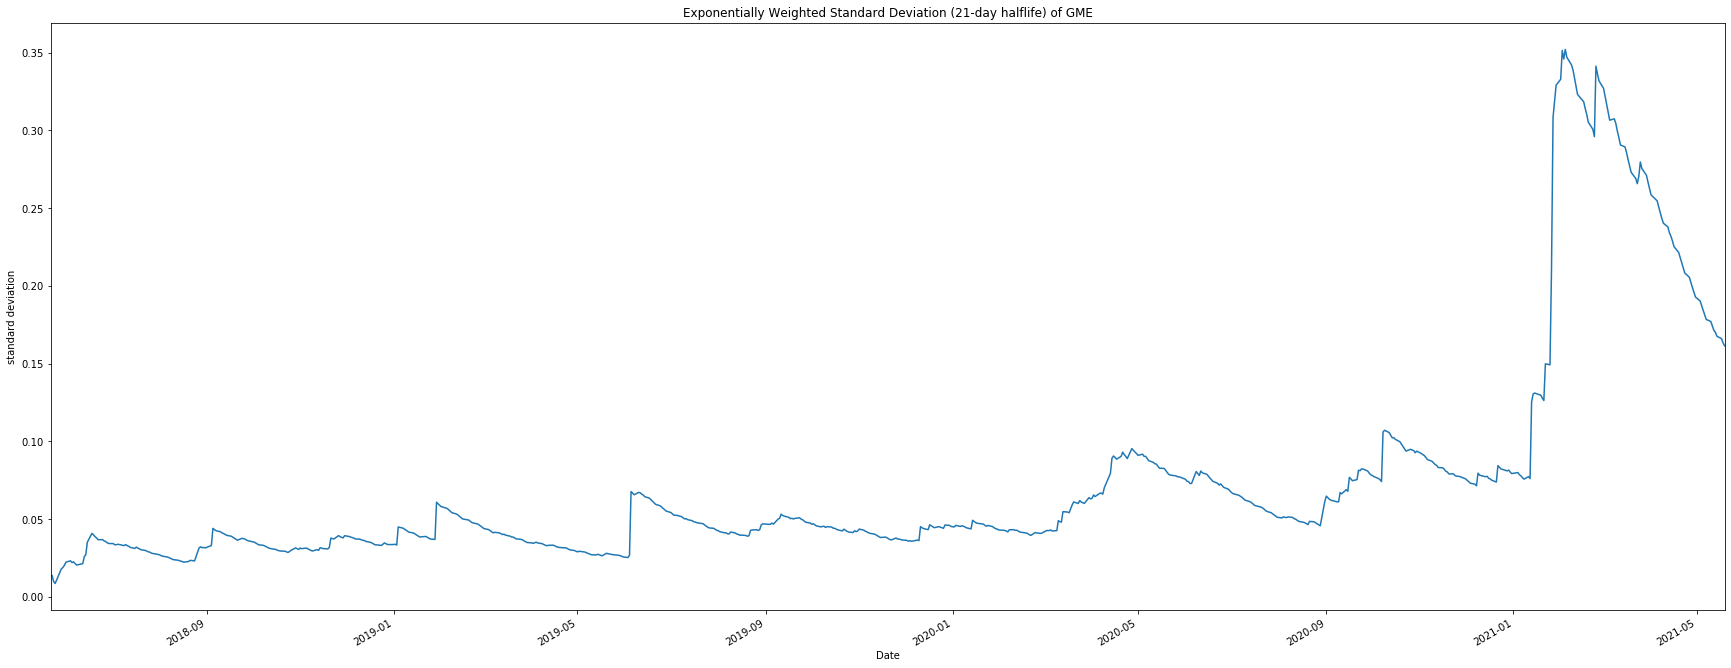

In [36]:

GME_ewm_std = daily_returns_ewm.plot(figsize=(30,12), title='Exponentially Weighted Standard Deviation (21-day halflife) of GME')
GME_ewm_std.set(ylabel='standard deviation')
plt.savefig("GME_ewm_std.png")
plt.show()



In [37]:
Social_GME_data.head()

Total Tweets  Closing Price
Date                                   
2018-05-21           301         12.765
2018-05-22           413         12.615
2018-05-23           324         12.710
2018-05-24           328         12.730
2018-05-25           315         12.640

In [38]:
Social_GME_data_index = Social_GME_data.reset_index().dropna() 

In [39]:
Social_GME_data_index.head()

Date  Total Tweets  Closing Price
0 2018-05-21           301         12.765
1 2018-05-22           413         12.615
2 2018-05-23           324         12.710
3 2018-05-24           328         12.730
4 2018-05-25           315         12.640

In [40]:
Social_GME_data_plot = Social_GME_data.loc[Social_GME_data_index['Date'][600:1094]]


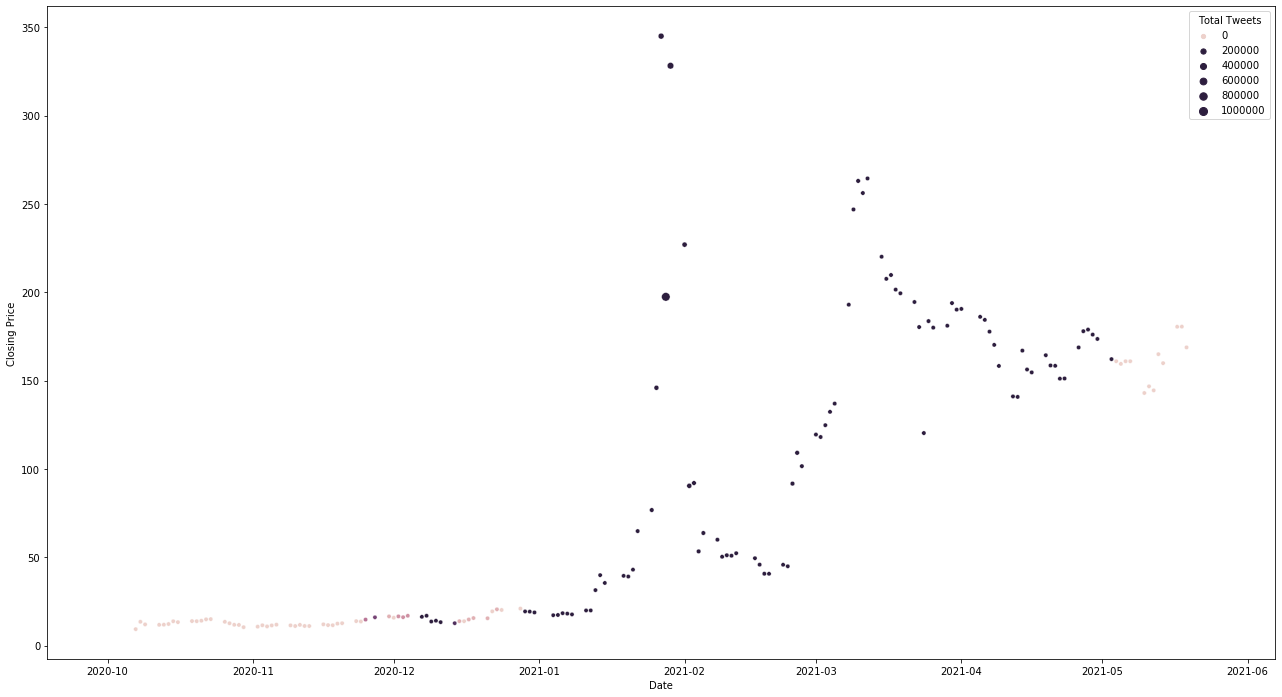

In [41]:

scatterplot_GME = sns.scatterplot(data=Social_GME_data_plot, x="Date", y="Closing Price", size='Total Tweets', hue="Total Tweets", hue_norm = (0,7))
plt.savefig("scatterplot_GME.png")


In [42]:
#Import Scoial media metrics into dashboard notebook

twitter_data_path = Path("twitter_data_2021.csv")

twitter_data = pd.read_csv(twitter_data_path, parse_dates=True, infer_datetime_format=True)

twitter_data['Date']=pd.to_datetime(twitter_data['Date'])

twitter_data = twitter_data.set_index('Date')

twitter_data = twitter_data.replace(',','',regex = True)

twitter_data = twitter_data.astype(int)

twitter_data.dtypes

max_twitter = twitter_data.max().max()

twitter_data.loc['2021-01-01':'2021-05-12'].hvplot(x='Date', y=['gamestock','gamestonk','r/wallstreetbets','gme'], rot =90, ylim=(0,max_twitter)).opts(yformatter="%.0f")




:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
# Plots to tell the financial data story

#daily return plot
GME_return_plt

#Simulation plots pre and post stock price volatility
Sim_plot_prevolatility
Sim_plot_postvolatility

#Moving weighted average standard deviation plot to show volatility
GME_ewm_std

# Pct change correlation between Social mentions and Stock price changes
social_GME_corr

#Scatterplot graph showing a relationship between date / stock price and twitter mentions (Just need to adjust the x axis scale and show dates from 2019 onwards)
scatterplot_GME




In [ ]:
#Create dashboard 

In [44]:

def GME_return():
    """Daily Return Plot"""
     
    plt_fig1 = plt.figure()
    fig1 = GME_daily_return.plot(figsize=(30,12), title='Daily Returns of GME')
    fig1.set(ylabel='Returns (%)')
    plt.axhline(y=0.0, color='k', alpha=0.5, linestyle='--') 
    plt.close(plt_fig1)
    fig1 = pn.pane.Matplotlib(plt_fig1)
    
    return fig1



In [59]:
def Sim_plot_prevol():
    """Simulation plots post stock price volatility"""
        
   
    fig2 = MC_ten_year_1.plot_simulation()
  
    return fig2.figure

In [60]:
def Sim_plot_postvol():
    """Simulation plots post stock price volatility"""
    
    
   
    fig3 = MC_ten_year_2.plot_simulation()
   
   
    return fig3.figure

In [47]:
def GME_ewm_s():
    """Moving weighted average standard deviation plot to show volatility"""
    
    
    plt_fig4 = plt.figure()
    fig4 = daily_returns_ewm.plot(figsize=(30,12), title='Exponentially Weighted Standard Deviation (21-day halflife) of GME')
    fig4.set(ylabel='standard deviation')
    plt.close(plt_fig4)
    fig4 = pn.pane.Matplotlib(plt_fig4)
    
   
    return fig4

In [48]:
def social_GME_c():
    """Pct change correlation between Social mentions and Stock price changes"""
    
    
    plt_fig5 = plt.figure()
    fig5 = Social_GME_pct_plot.corr()
    sns.heatmap(fig5 ,vmin=-1, vmax=1)
    plt.close(plt_fig5)
    fig5 = pn.pane.Matplotlib(plt_fig5)
    
   
    return fig5

In [55]:
def scatterplot():
    """Scatterplot graph showing a relationship between date / stock price and twitter mentions (Just need to adjust the x axis scale and show dates from 2019 onwards"""
    
    plt_fig6= plt.figure()
    fig6 = sns.scatterplot(data=Social_GME_data_plot, x="Date", y="Closing Price", size='Total Tweets', hue="Total Tweets", hue_norm = (0,7))
    plt.close(plt_fig6)
    fig6 = pn.pane.Matplotlib(plt_fig6)
    
    return fig6

In [49]:
def twitter_chart():
    """Line graph showing the key word mentions over the period of time"""
    
    plt_fig7= plt.figure()
    fig7 = twitter_data.loc['2021-01-01':'2021-05-12'].hvplot(x='Date', y=['gamestock','gamestonk','r/wallstreetbets','gme'], rot =90, ylim=(0,max_twitter)).opts(yformatter="%.0f")
    plt.close(plt_fig7)
    fig7 = pn.pane.Matplotlib(plt_fig7)
    
    return fig7



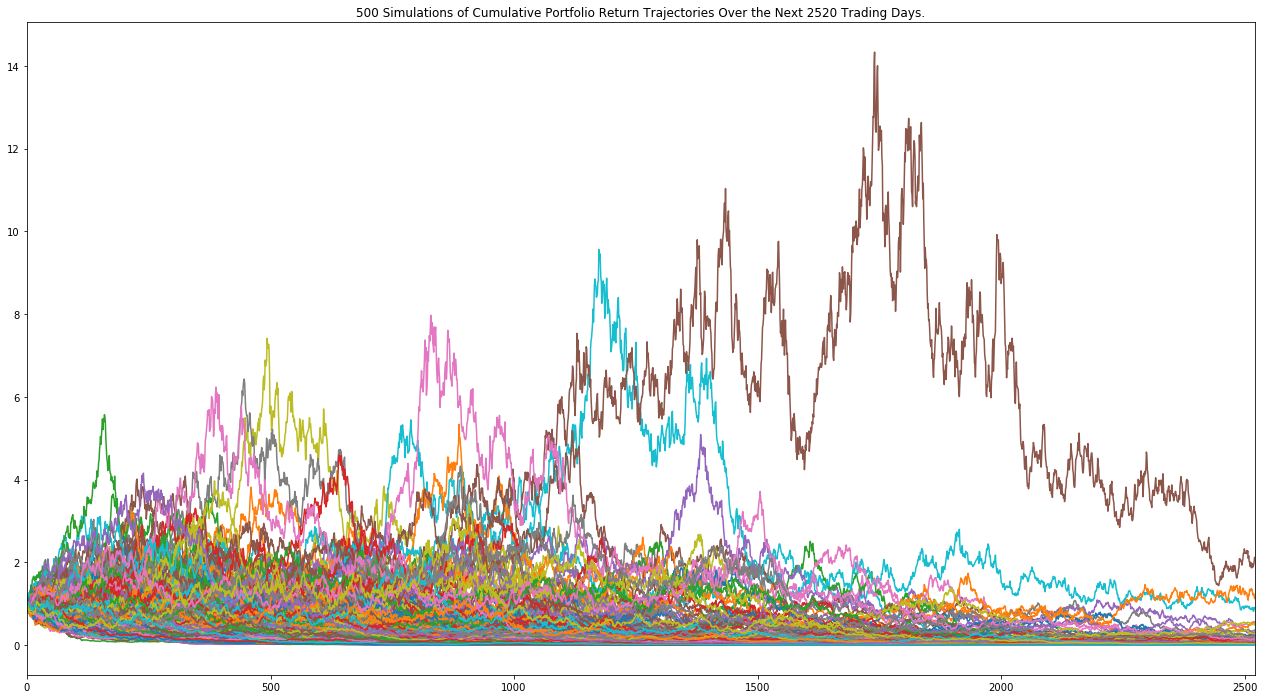

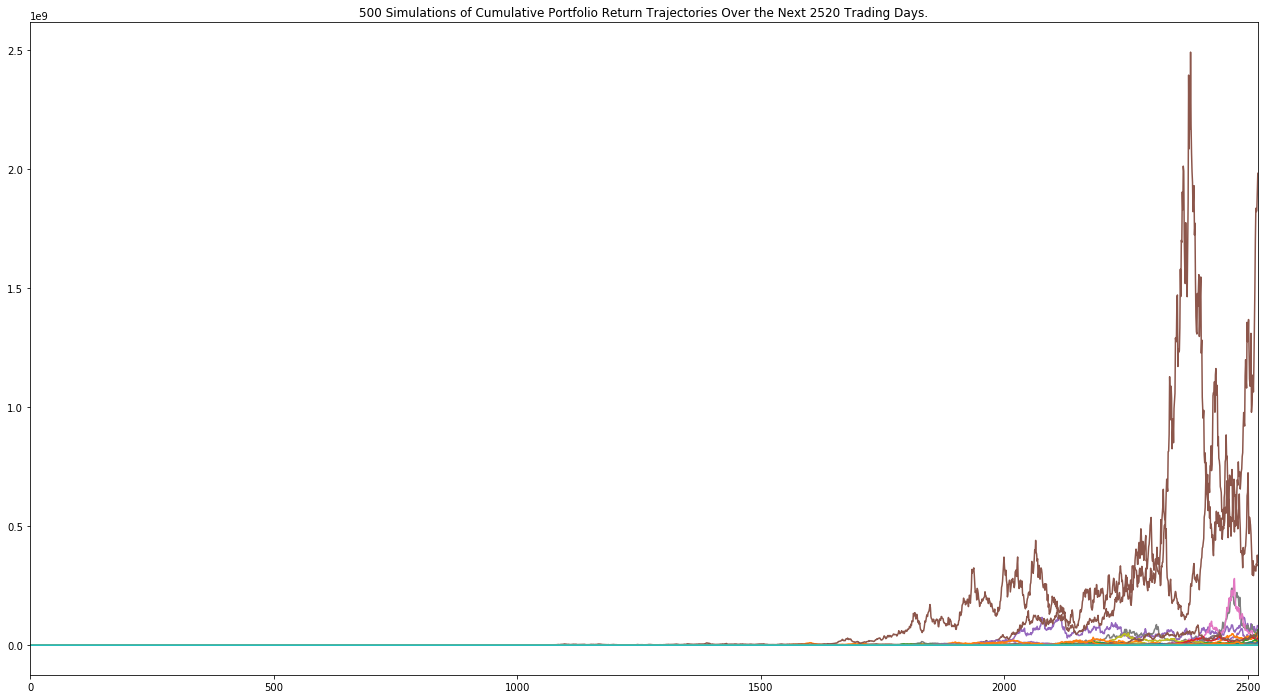

In [61]:
# Create a title for the dashboard
dash_title = pn.pane.Markdown(
    """
    # Gamestop - Social Event
    """)


# Creating other misc elements for the dashboard
overview_msg = pn.pane.Markdown(
    """
    This dashboard aims to provide a snapshot of the analysis completed on the Gamestop event that occured in 2021 and how social media influenced the price.
    <br>
    
    """)

overview_tab = pn.Column('## Dashboard GME Overview', overview_msg, GME_return(),social_GME_c(),twitter_chart())
montecarlo_tab = pn.Column('## Monte Carlo Simulations', overview_msg, Sim_plot_prevol(), Sim_plot_postvol())
correlation_tab = pn.Column('## Correlation', GME_ewm_s(),scatterplot()) 

# Create a tab layout for the dashboard

dash_tabs = pn.Tabs(('Overview', overview_tab),
                  ('Monte Carlo Simulations', montecarlo_tab),
                   ('Correlation',correlation_tab ),)


In [62]:
# Create the dashboard
dashboard = pn.Column(pn.Row(dash_title), dash_tabs, width=1500)


Column(width=1500)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Matplotlib(Figure)
            [3] Matplotlib(Figure)
            [4] Matplotlib(Figure)
        [1] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Matplotlib(Figure)
            [3] Matplotlib(Figure)
        [2] Column
            [0] Markdown(str)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
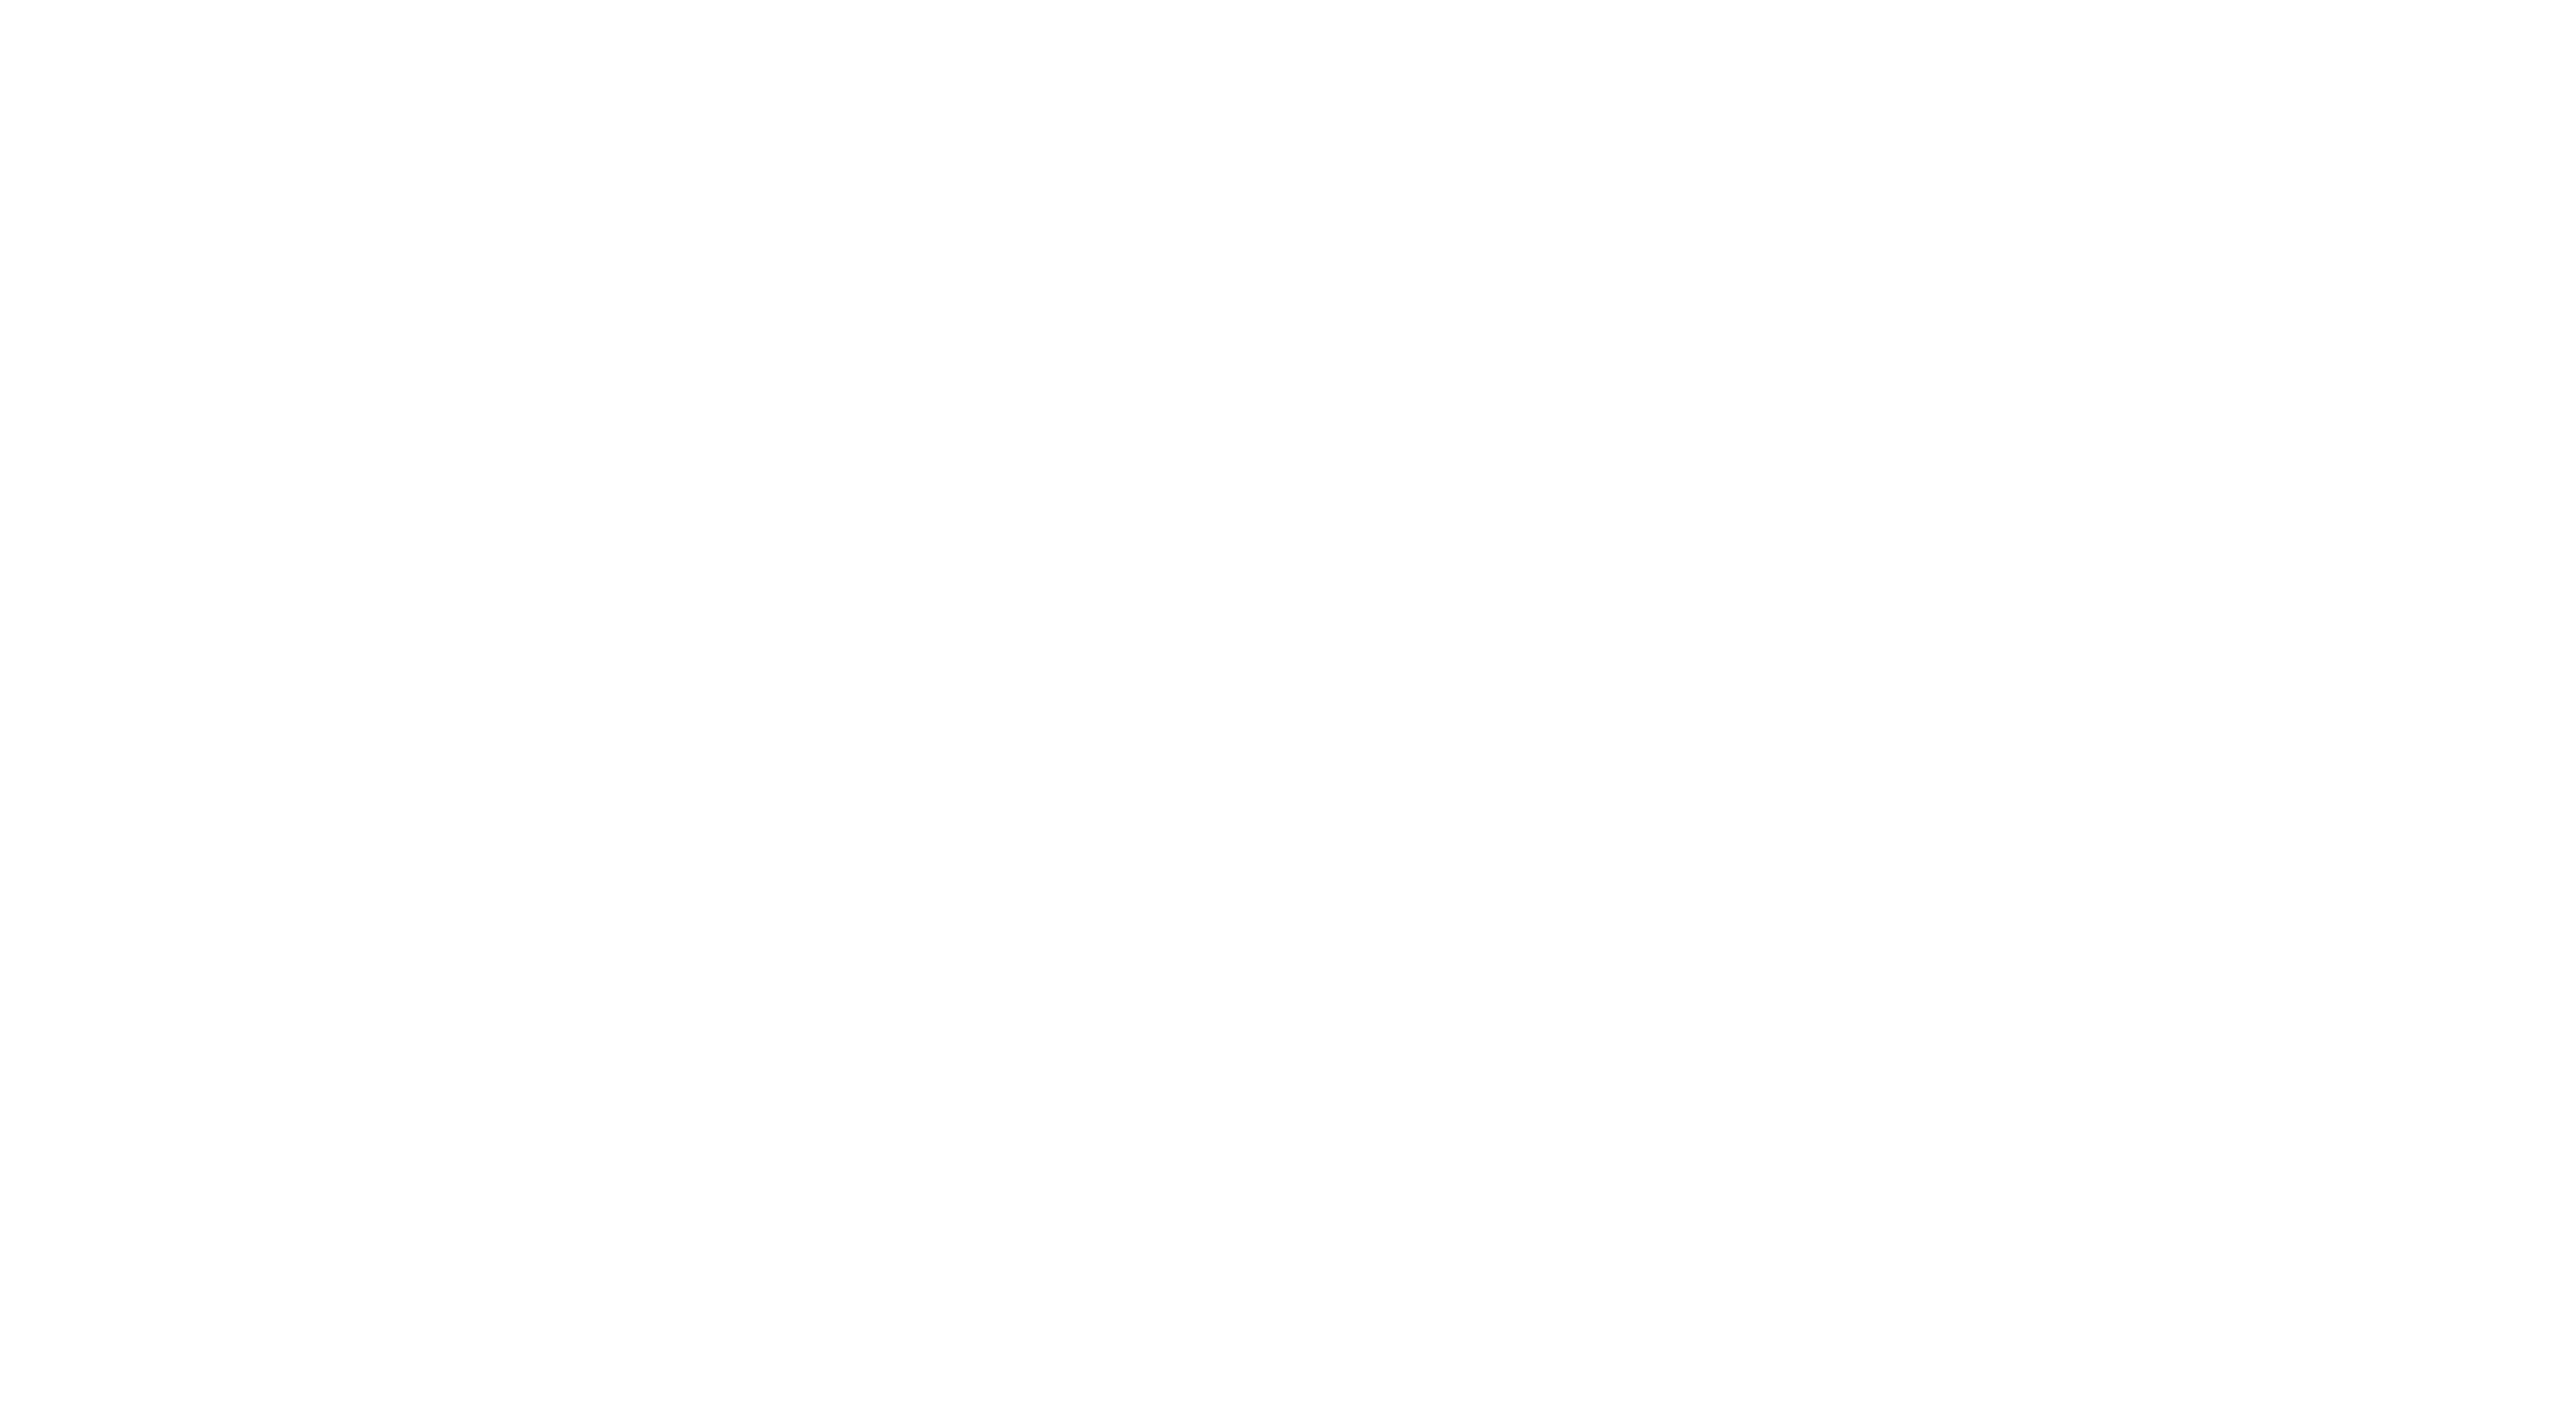
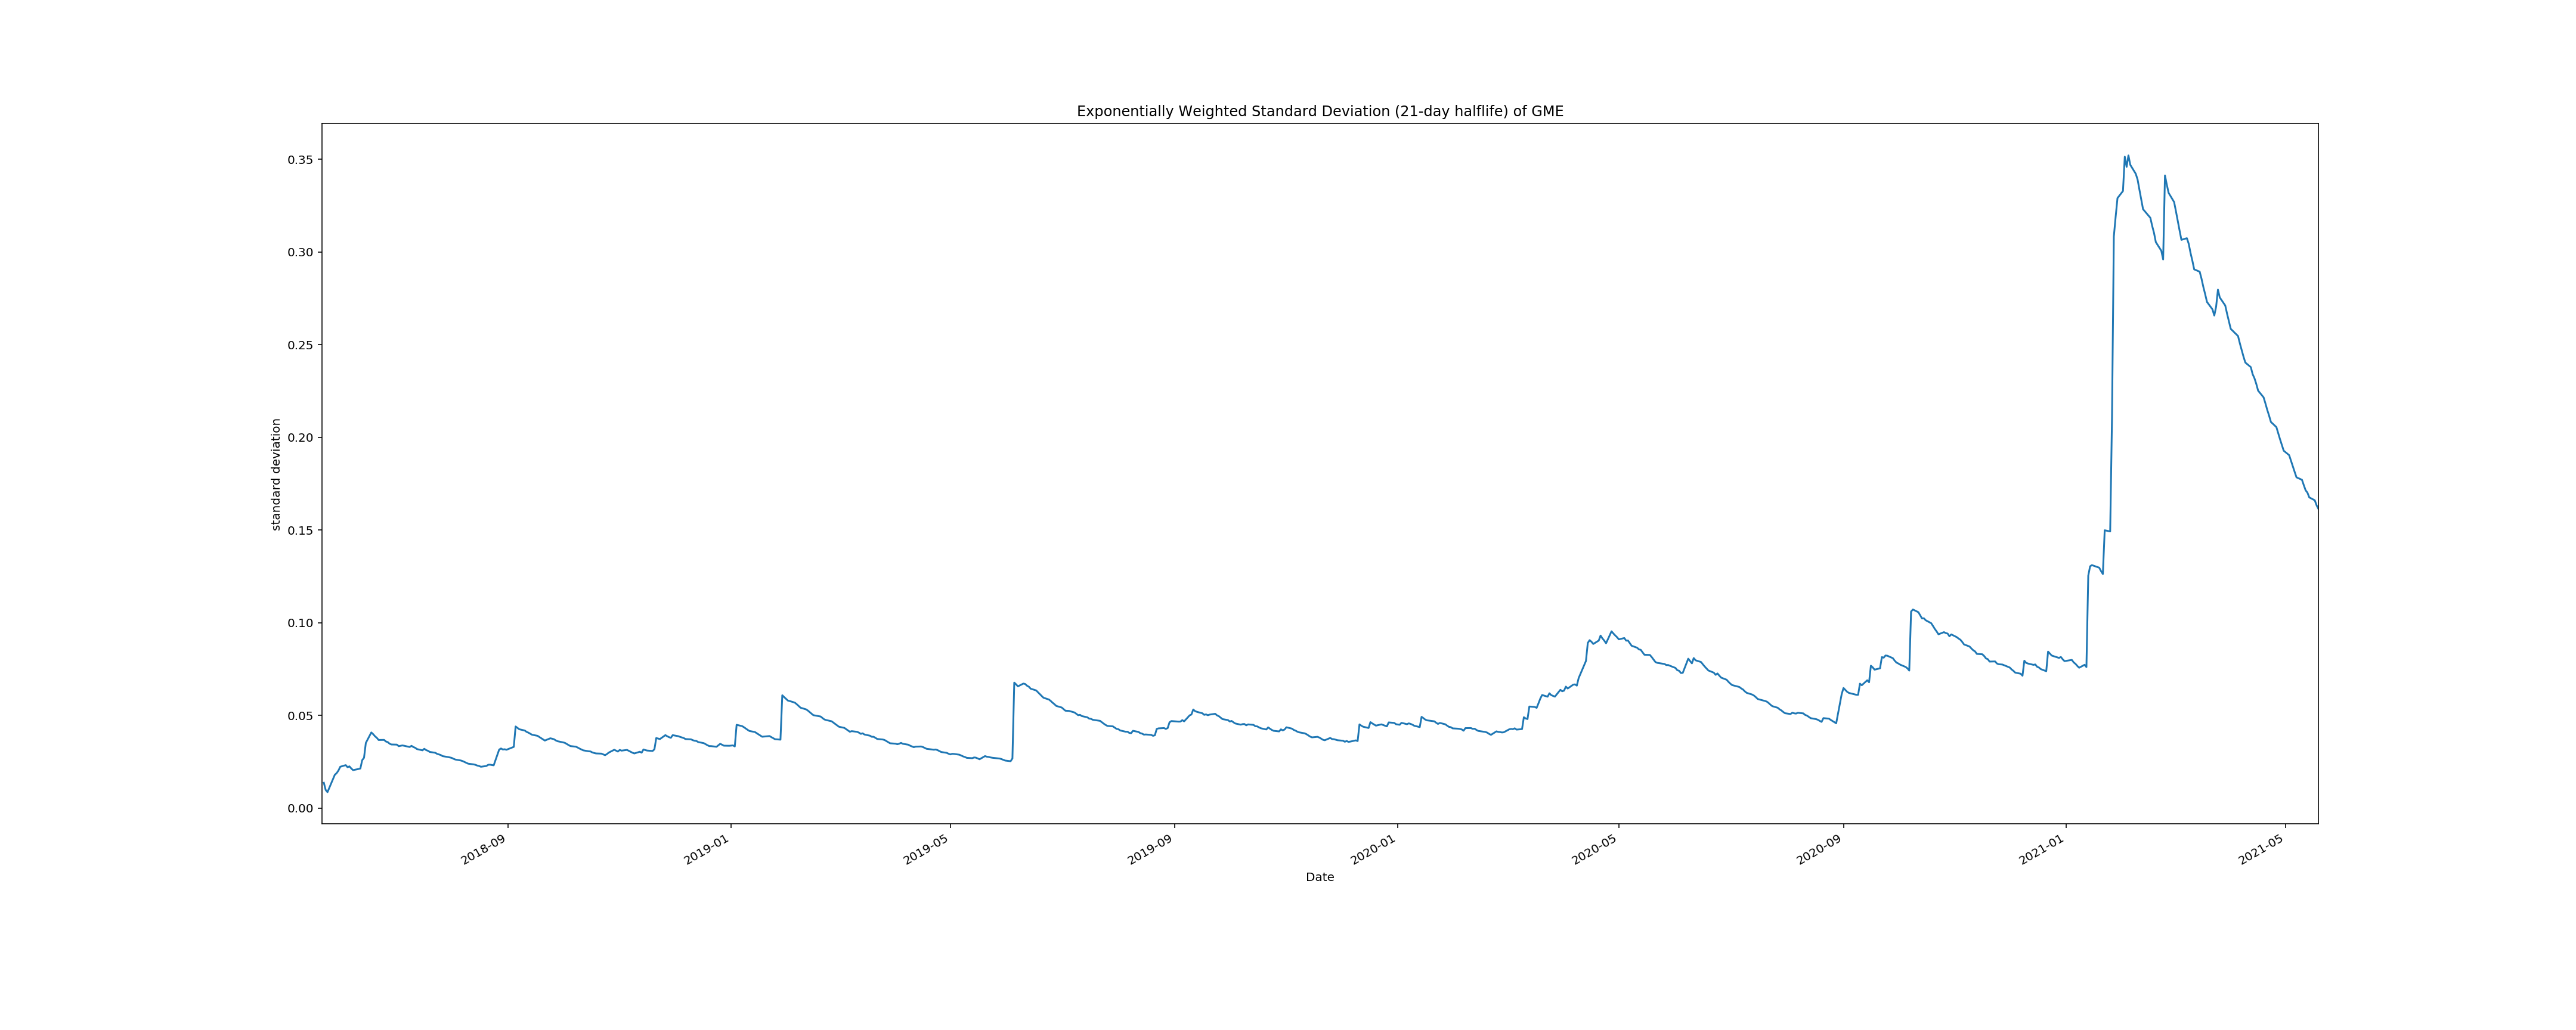
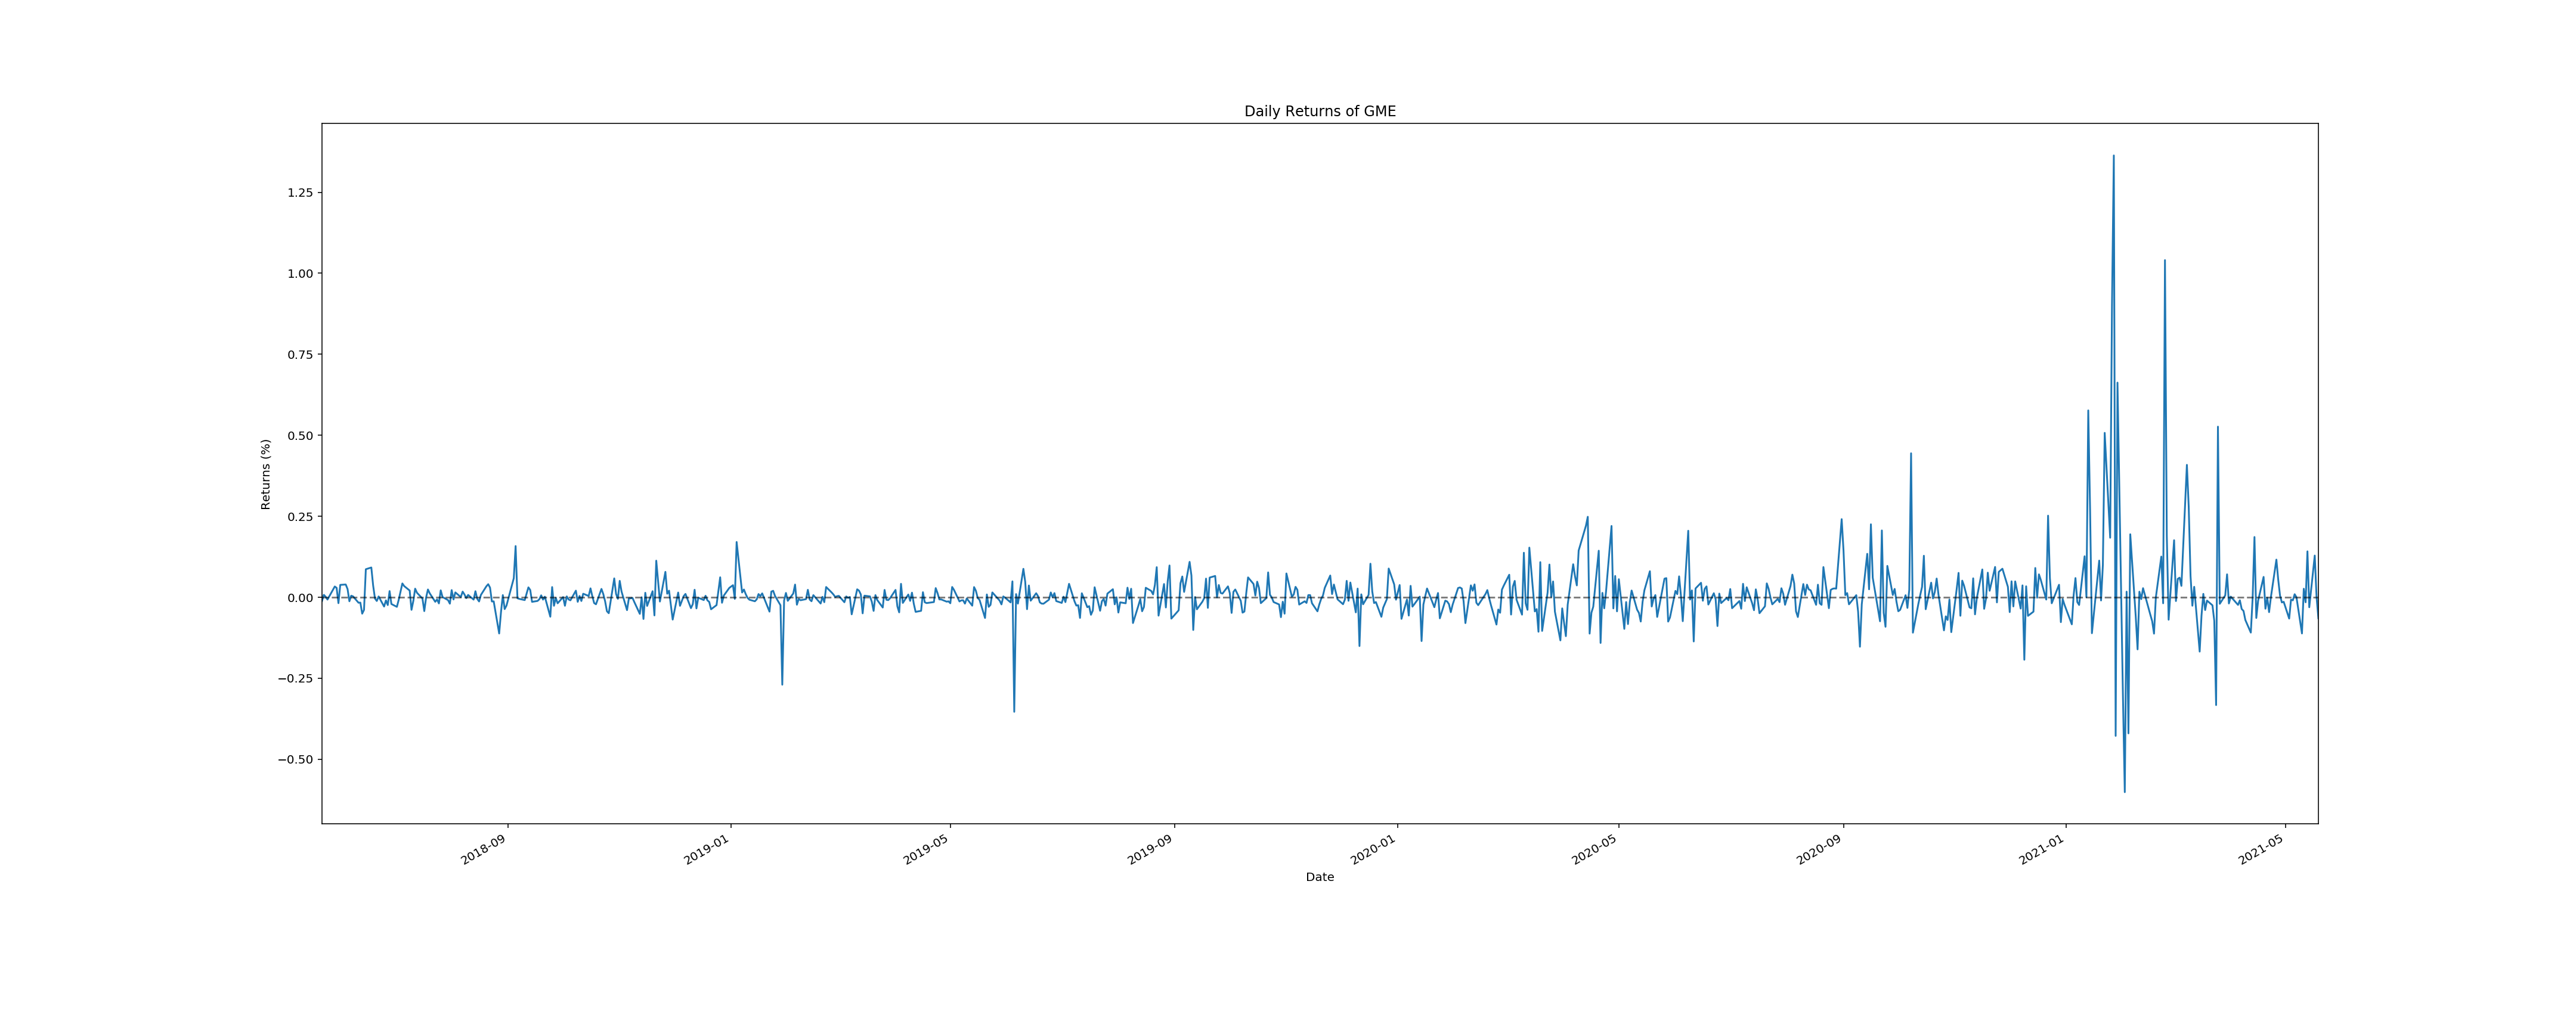
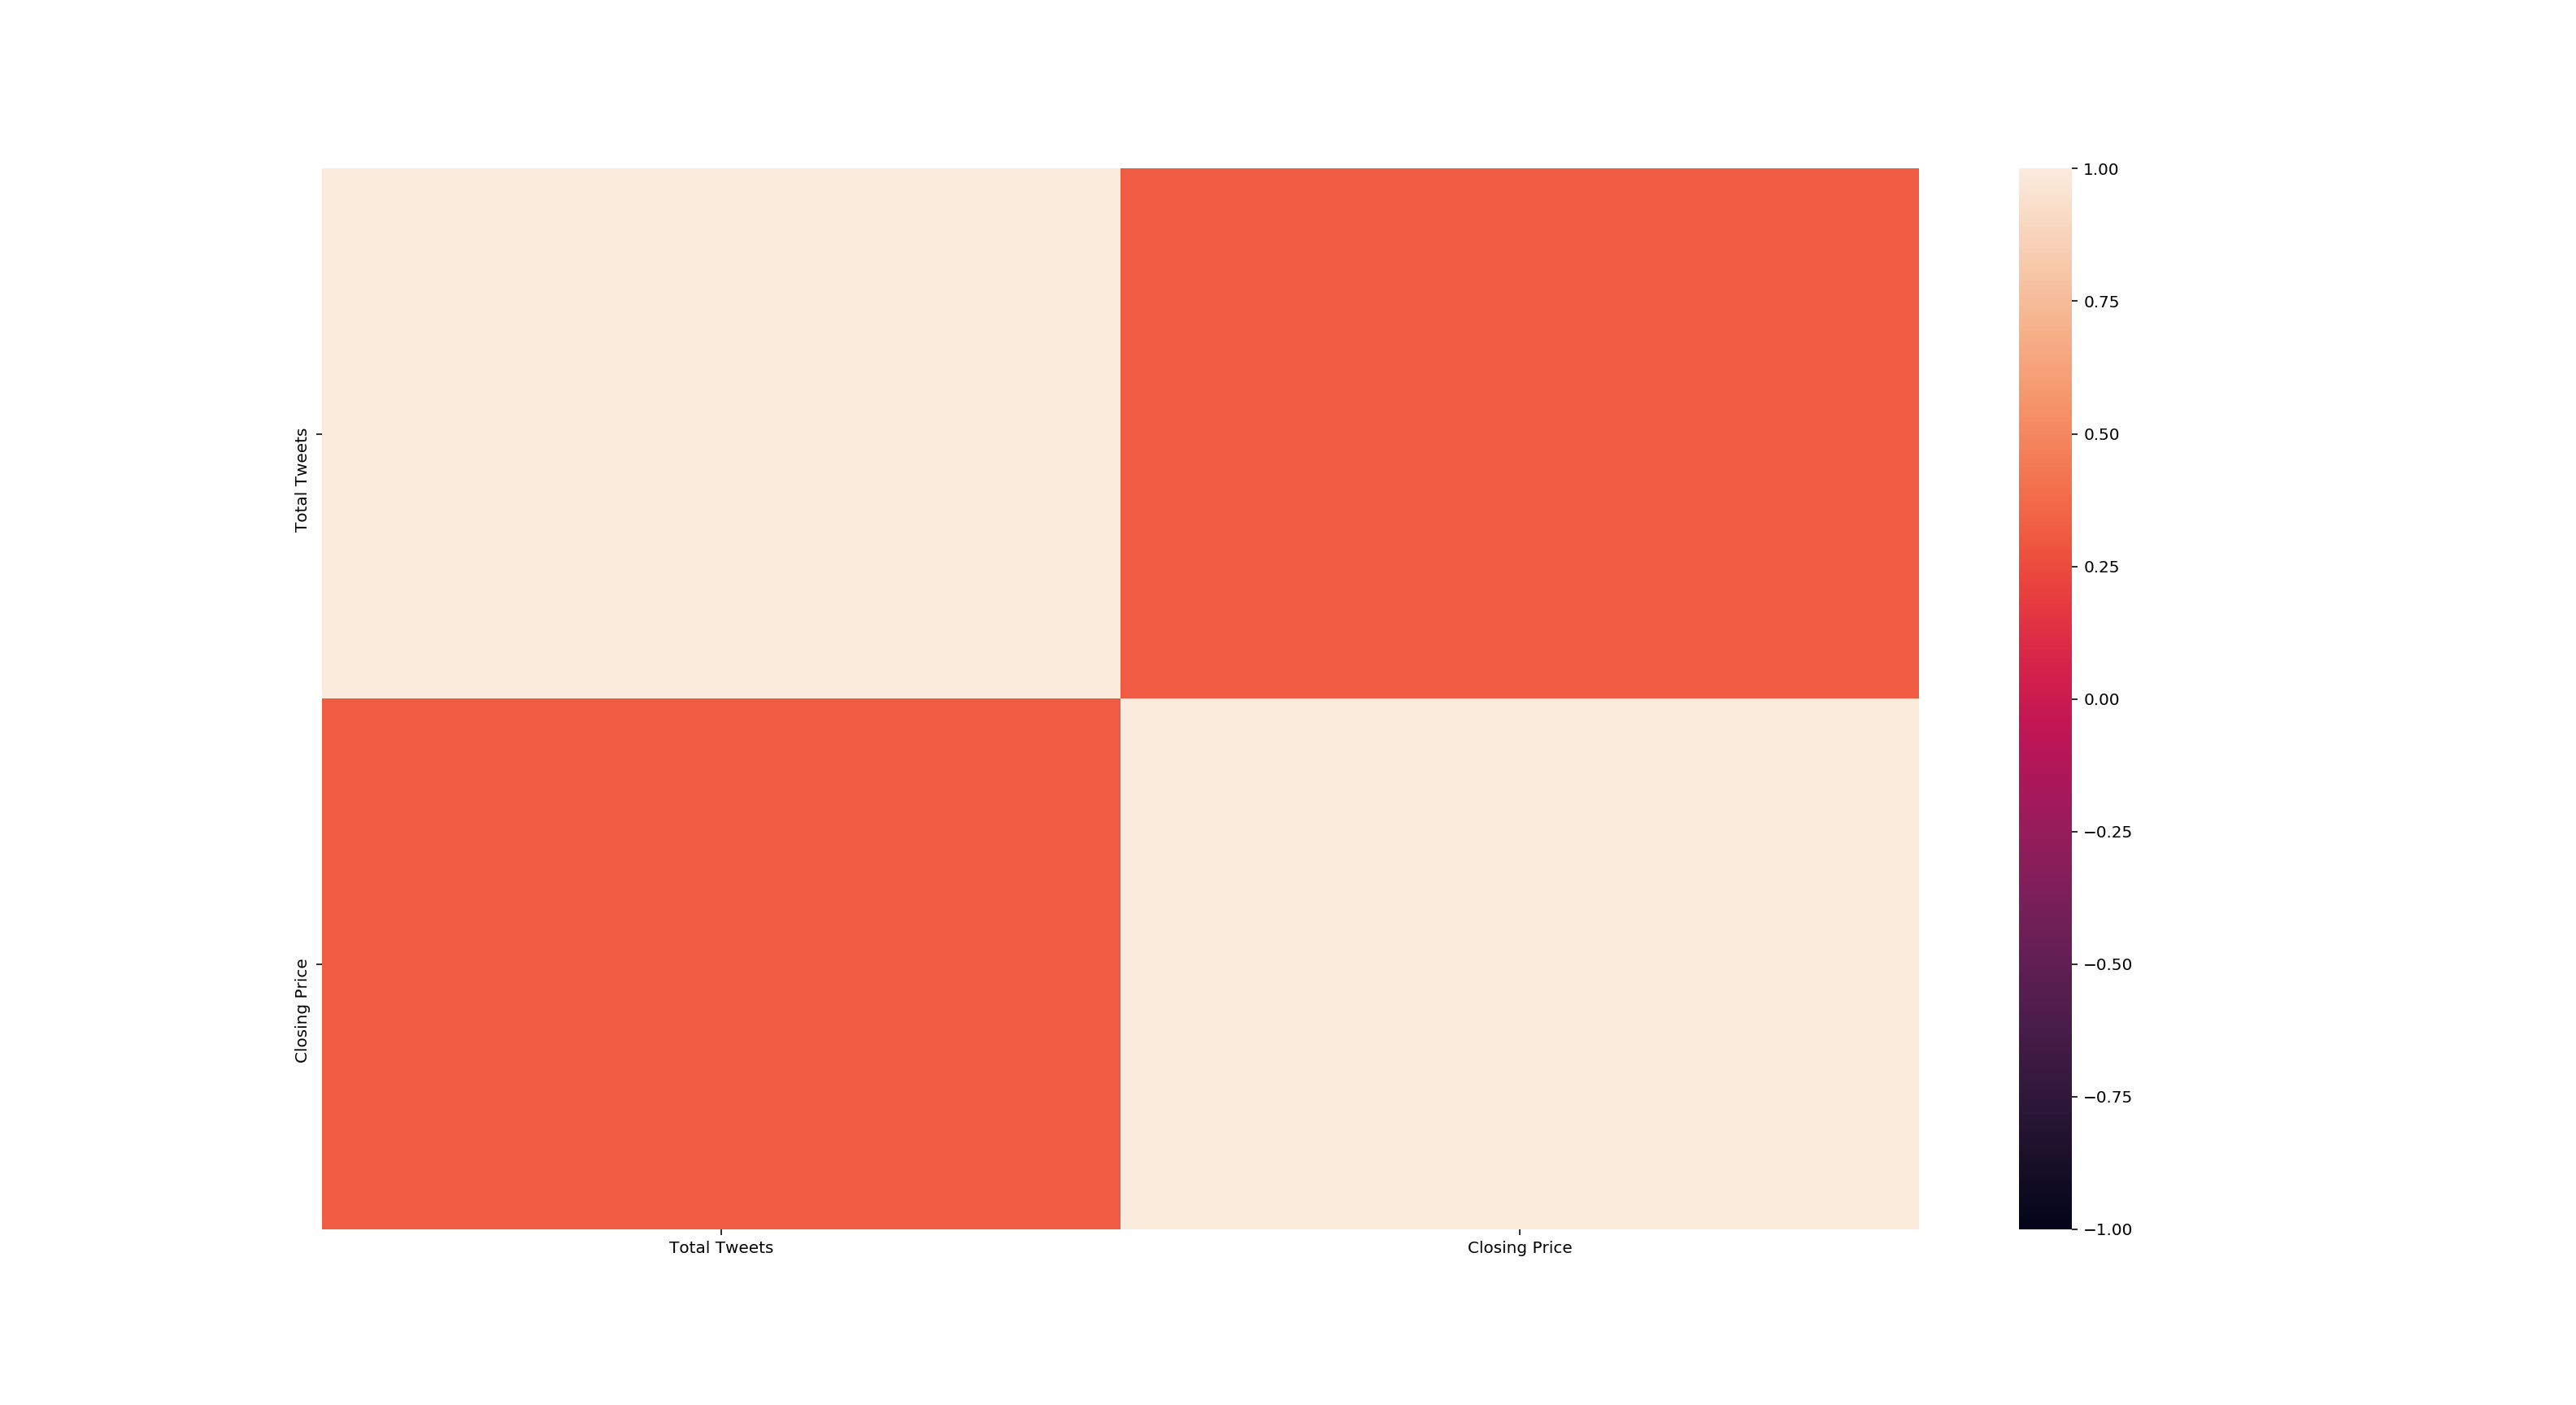
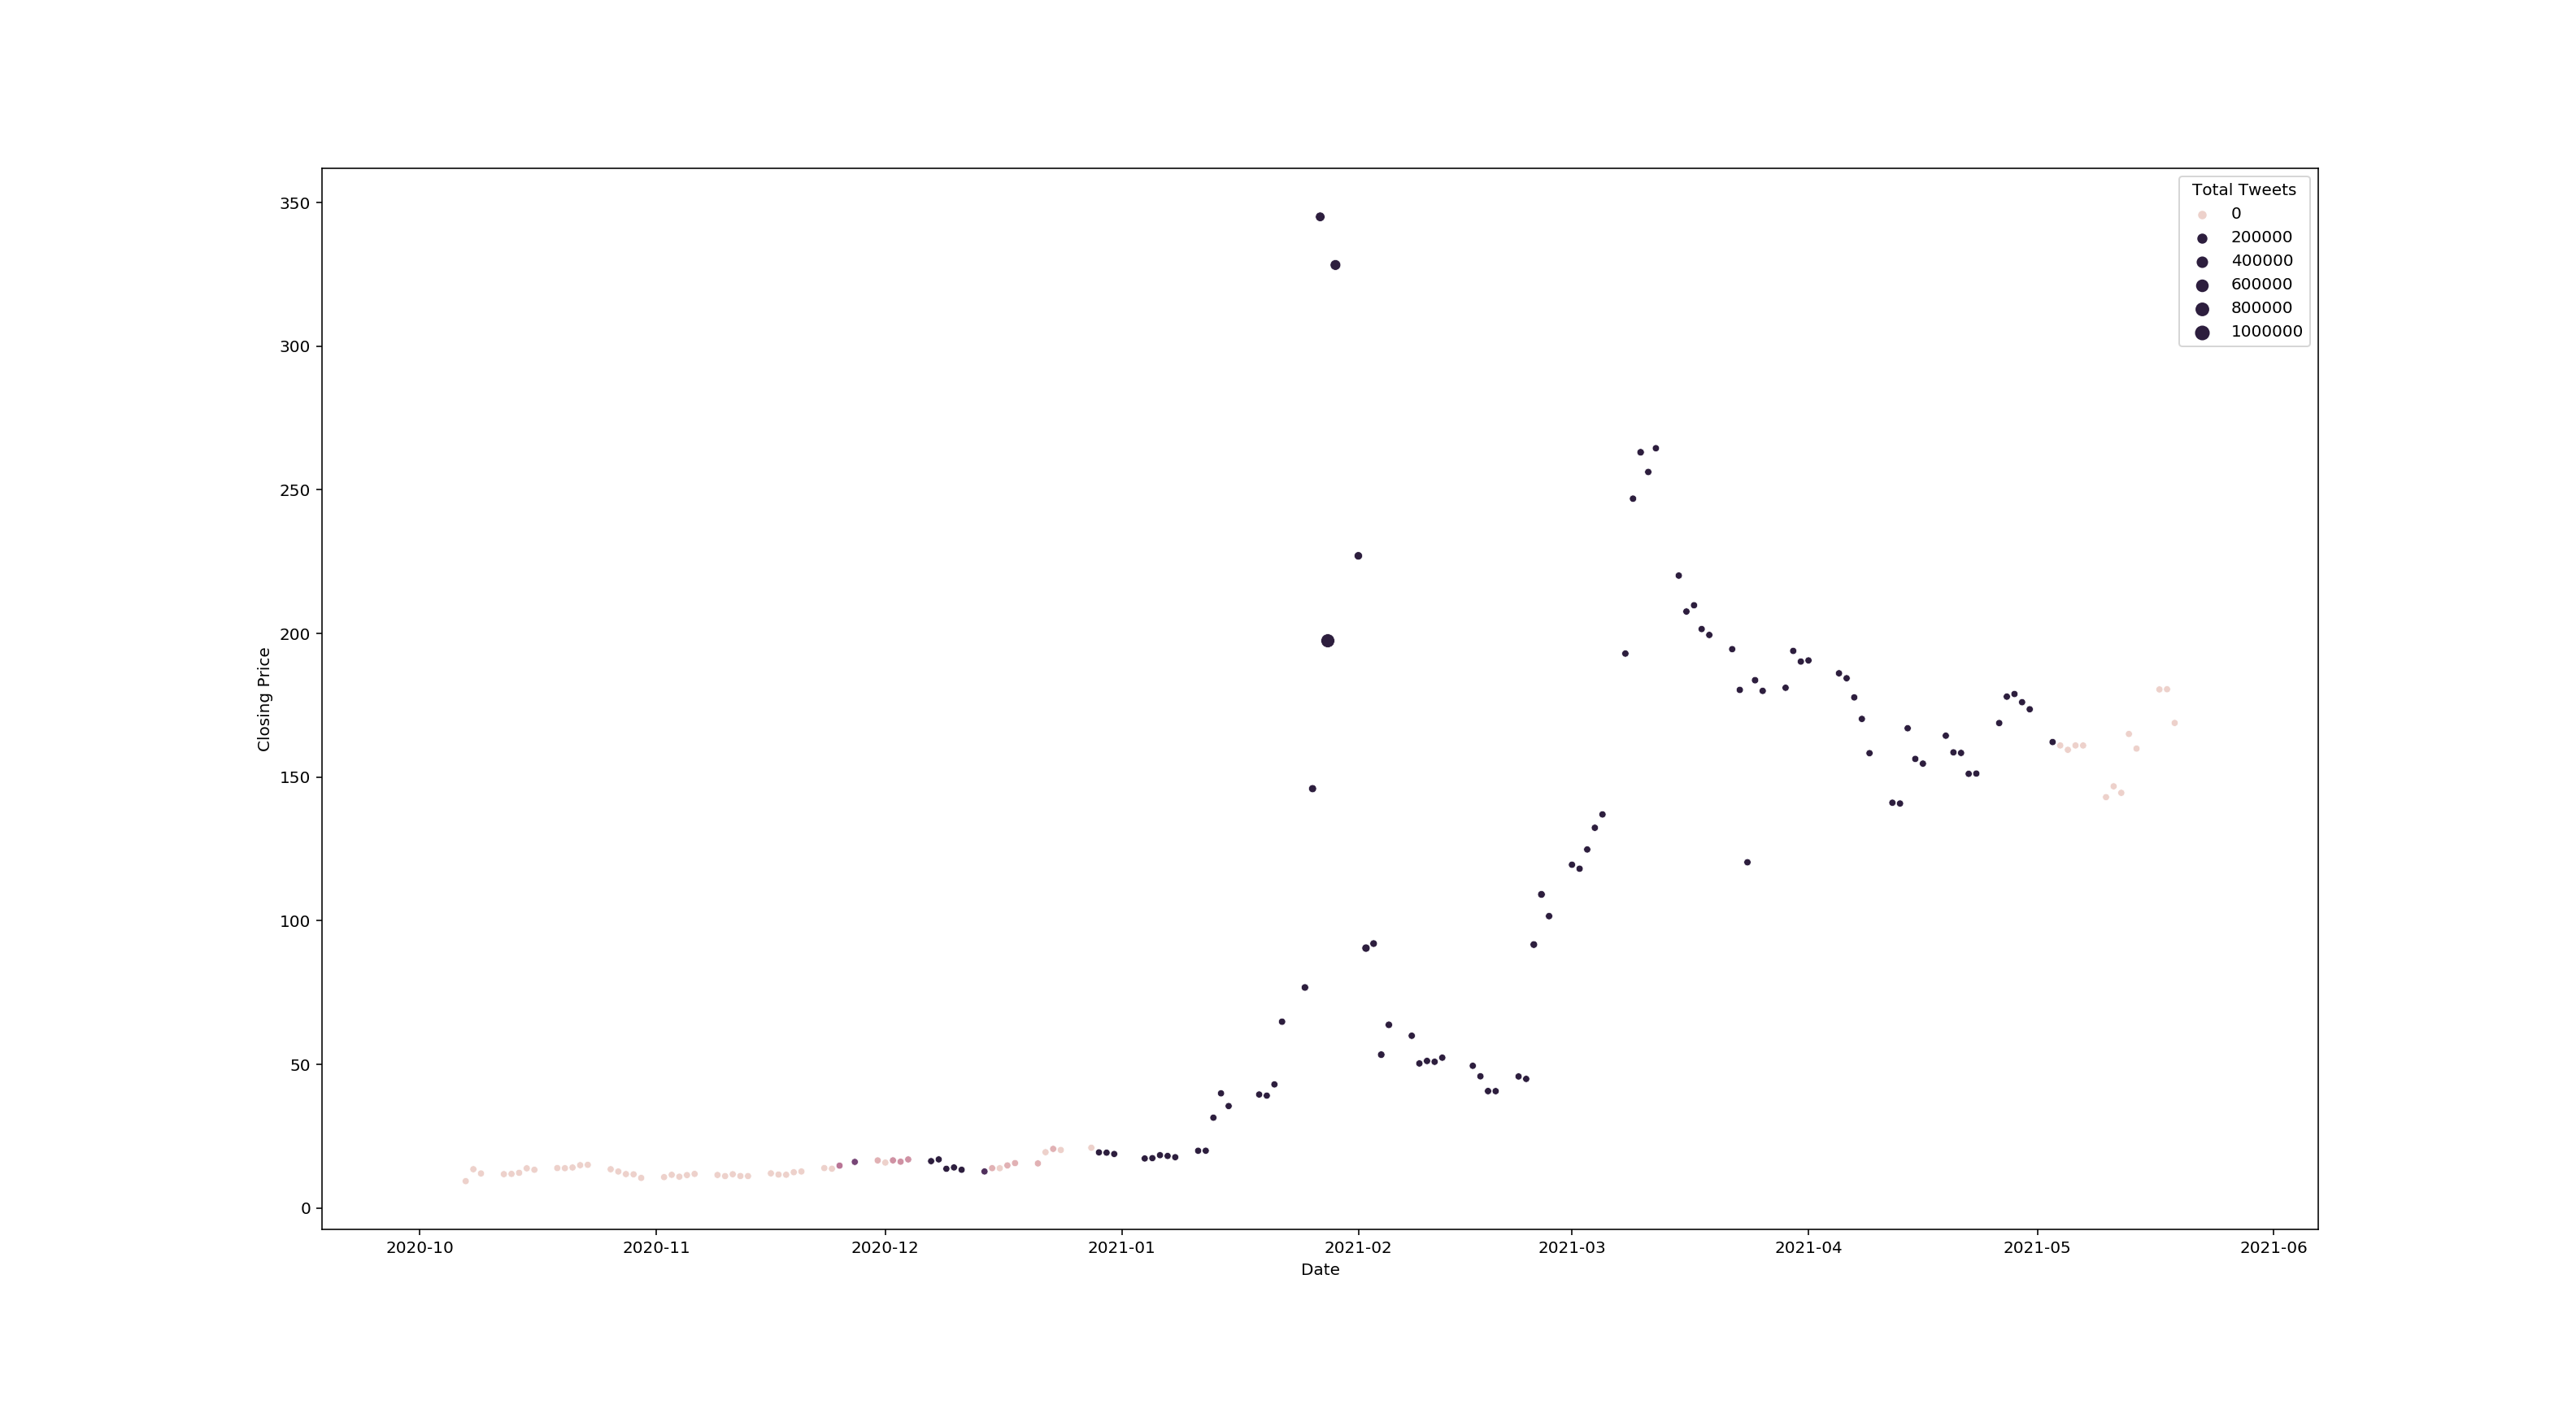
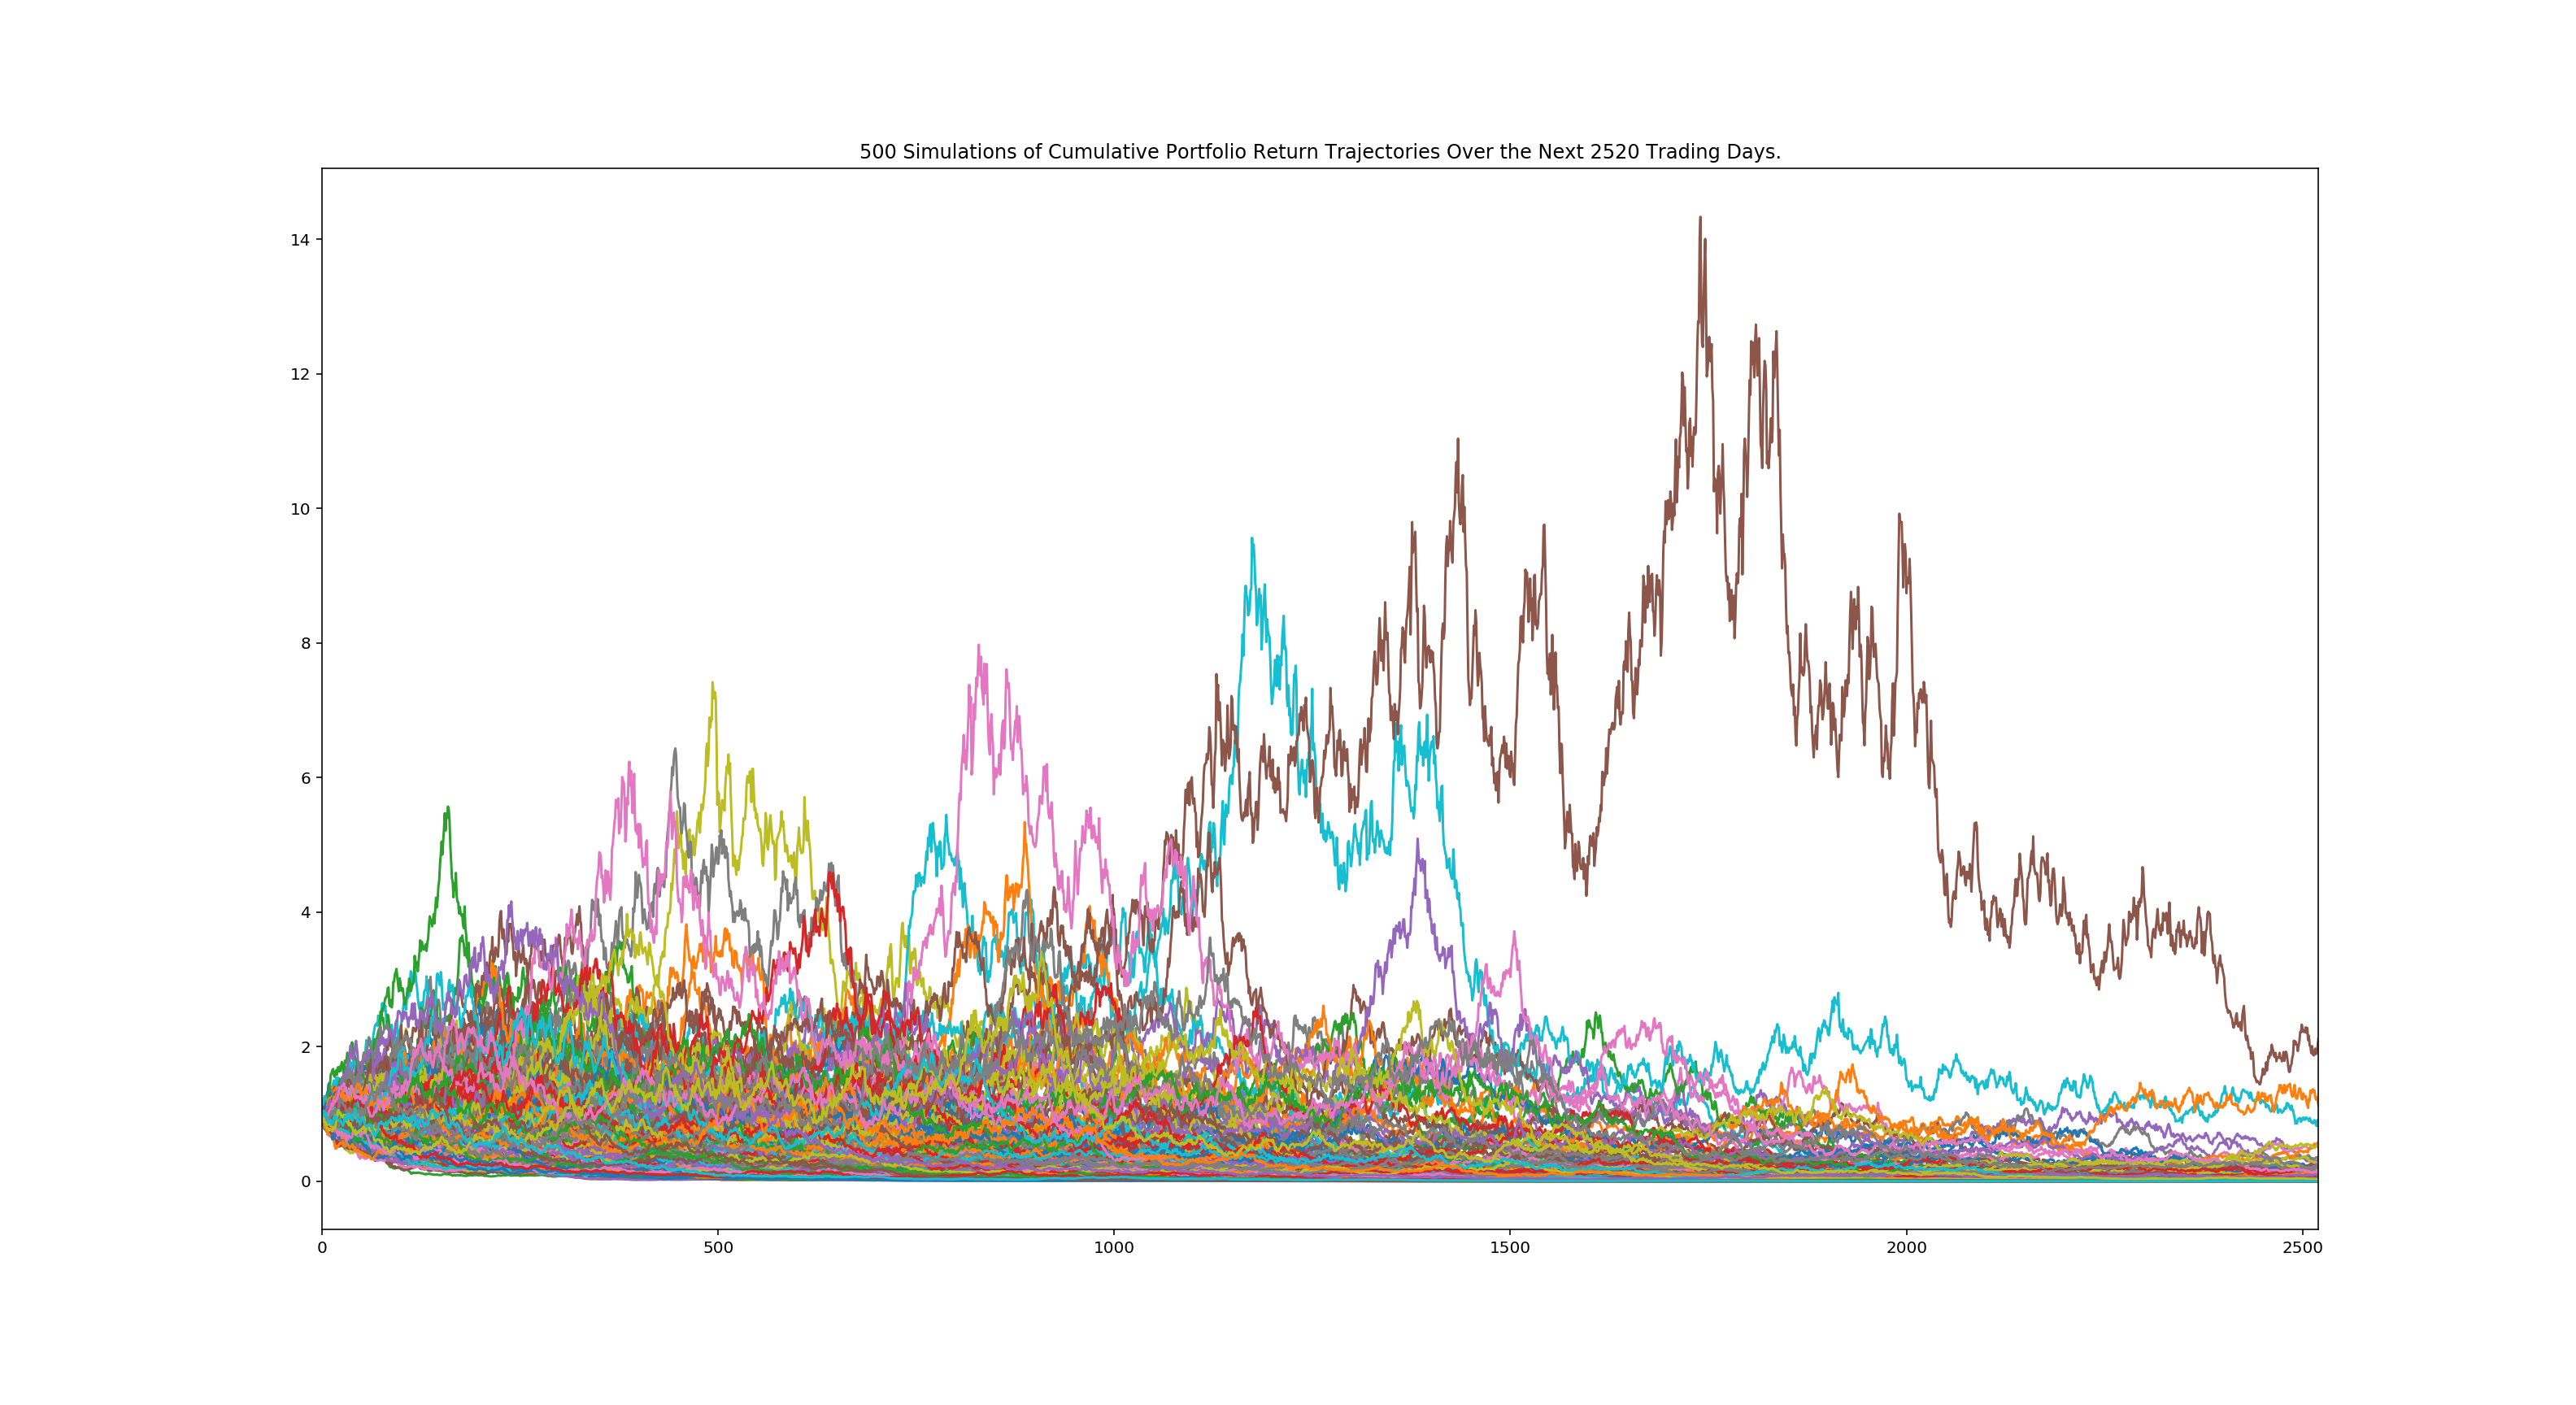
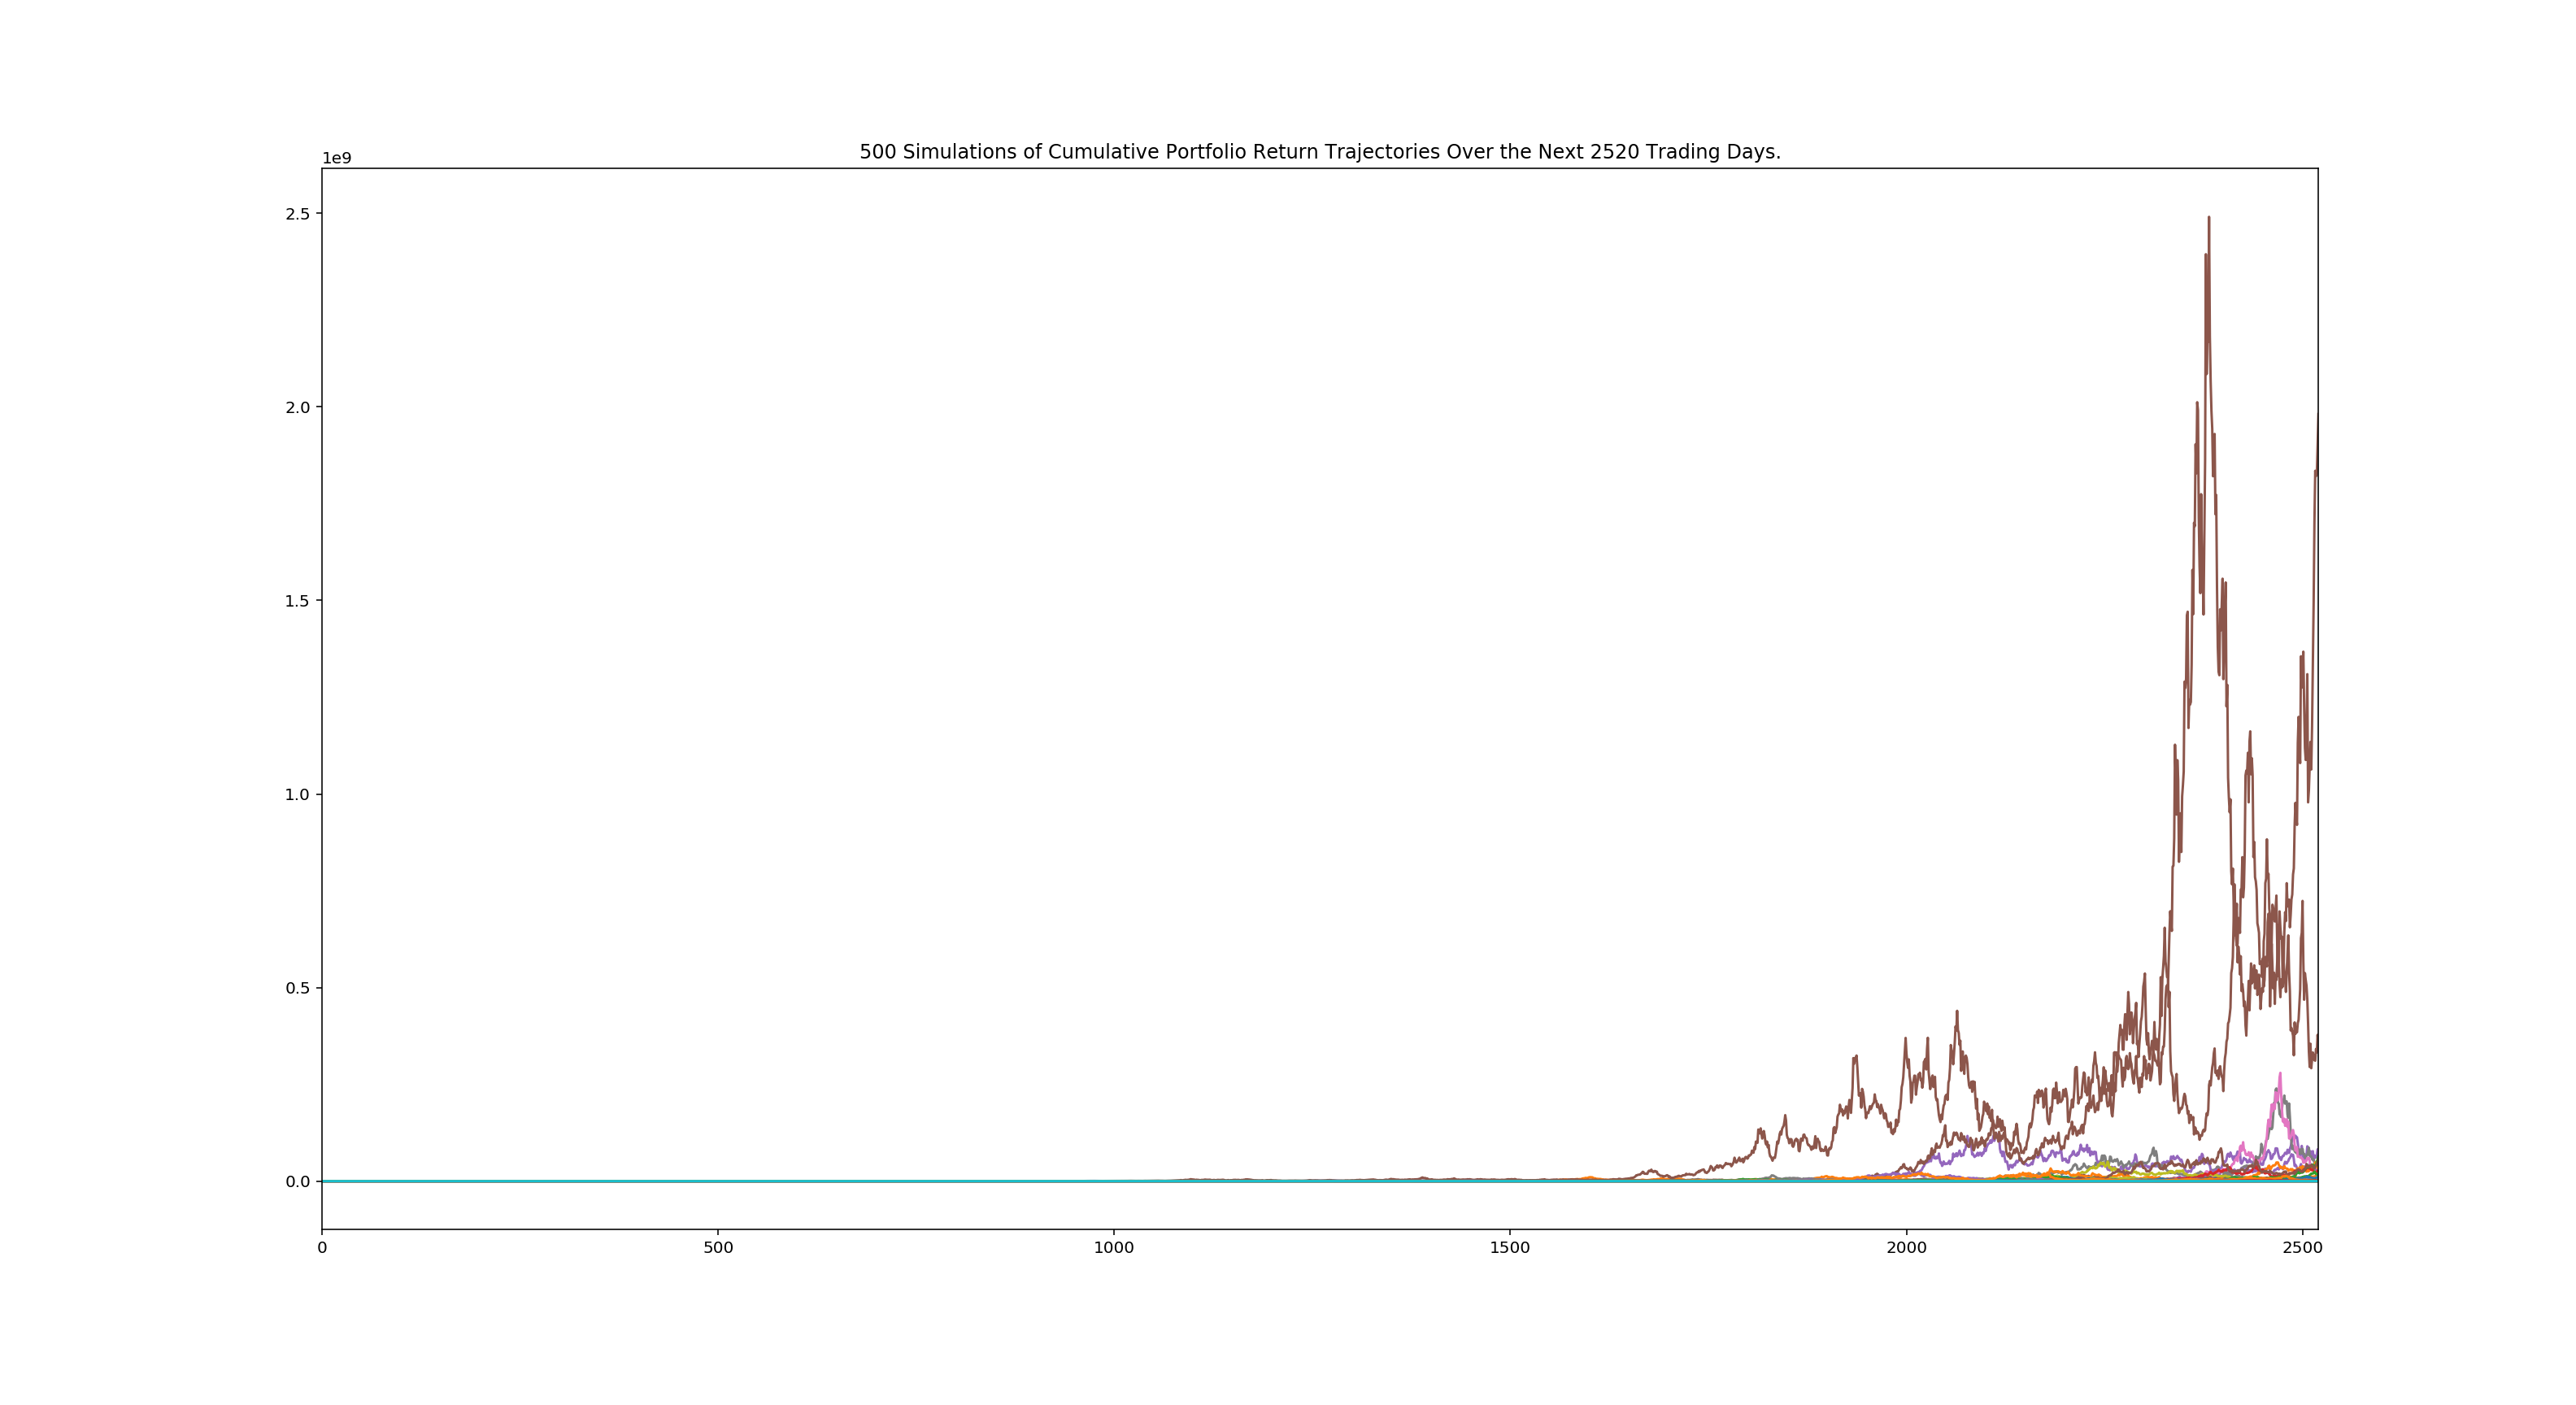

In [63]:
# Serve the dashboard
dashboard.servable()